In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../../data/data_anal_proj/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [116]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [5]:
df.info(), df.User_ID.unique().shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(1), int64(5), object(4)
memory usage: 39.9+ MB


(None, (5891,))

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
df_uniq = df.copy()
df_uniq = df_uniq[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']]
df_uniq = df_uniq.drop_duplicates()
df_uniq_index = df_uniq.set_index('User_ID')
df_uniq_index

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,
1000001,F,0-17,10,A,2,0
1000002,M,55+,16,C,4,0
1000003,M,26-35,15,A,3,0
1000004,M,46-50,7,B,2,1
1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...
1004588,F,26-35,4,C,0,0
1004871,M,18-25,12,C,2,0
1004113,M,36-45,17,C,3,0


In [8]:
df_uniq.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df_uniq_fair_age = df_uniq.copy()
df_uniq_fair_age['Age']= df_uniq['Age'].replace({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':5, '55+':6})
df_uniq_fair_age # 46-50과 51-55를 합쳐서 다른 기준들과 비슷하게 묶어봄

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,1,10,A,2,0
4,1000002,M,6,16,C,4,0
5,1000003,M,3,15,A,3,0
6,1000004,M,5,7,B,2,1
9,1000005,M,3,20,A,1,1
...,...,...,...,...,...,...,...
185450,1004588,F,3,4,C,0,0
187076,1004871,M,2,12,C,2,0
221494,1004113,M,4,17,C,3,0
229480,1005391,M,3,7,A,0,0


In [10]:
df_uniq

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
185450,1004588,F,26-35,4,C,0,0
187076,1004871,M,18-25,12,C,2,0
221494,1004113,M,36-45,17,C,3,0
229480,1005391,M,26-35,7,A,0,0


In [11]:
df_uniq_age = df_uniq.copy()
df_uniq_age['Age'] = df_uniq['Age'].replace({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df_uniq_age.Age.unique() #원래 나눈 기준대로 만든 데이터프레임

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [12]:
df_uniq_age

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,1,10,A,2,0
4,1000002,M,7,16,C,4,0
5,1000003,M,3,15,A,3,0
6,1000004,M,5,7,B,2,1
9,1000005,M,3,20,A,1,1
...,...,...,...,...,...,...,...
185450,1004588,F,3,4,C,0,0
187076,1004871,M,2,12,C,2,0
221494,1004113,M,4,17,C,3,0
229480,1005391,M,3,7,A,0,0


In [13]:
df_uniq_fair_age.Age.unique()

array([1, 6, 3, 5, 4, 2], dtype=int64)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

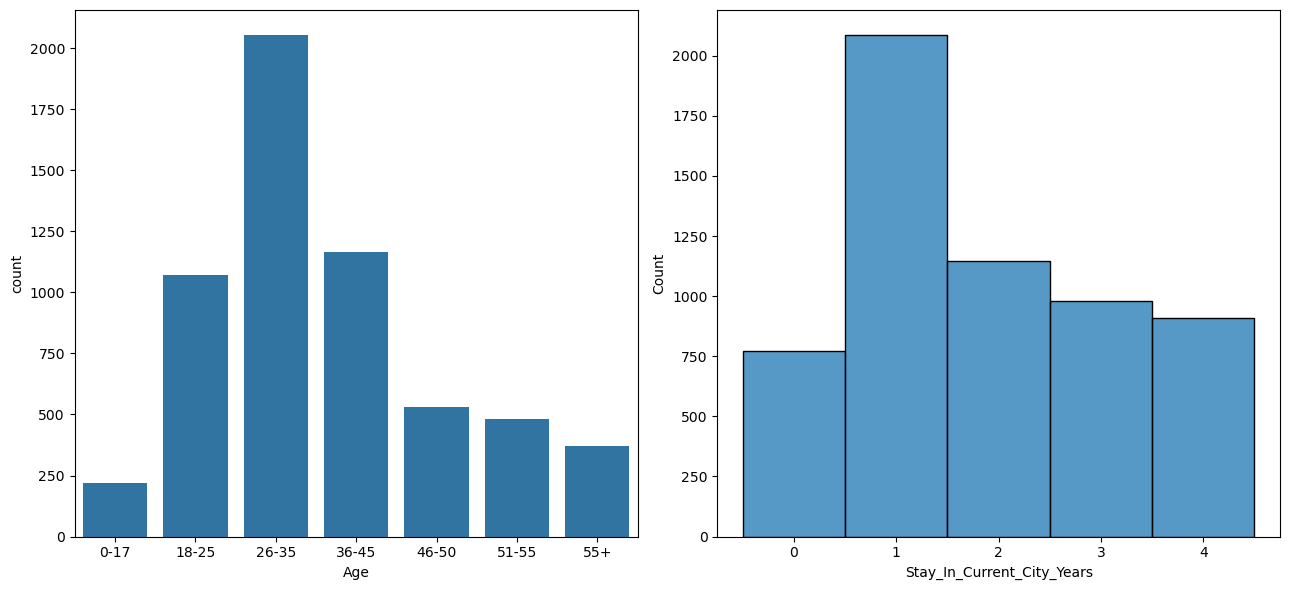

In [15]:
hist, ax = plt.subplots(1,2, figsize=(13, 6))
sns.countplot(data=df_uniq, x='Age', ax = ax[0], order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.histplot(data=df_uniq, x='Stay_In_Current_City_Years', ax = ax[1], discrete=True)
hist.set_tight_layout(True)
plt.show()

1. 26-35세가 가장 많고, 0-17세가 가장 적다
2. 46-50과 51-55를 합치면 꽤나 많은 수의 회원이다.
3. 현재 도시에서 1년이상 2년미만이 된 회원이 가장 많다
4. 4년 이상 오래 거주한 회원도 적지 않다
5. 1년 미만인 회원이 가장 적다.

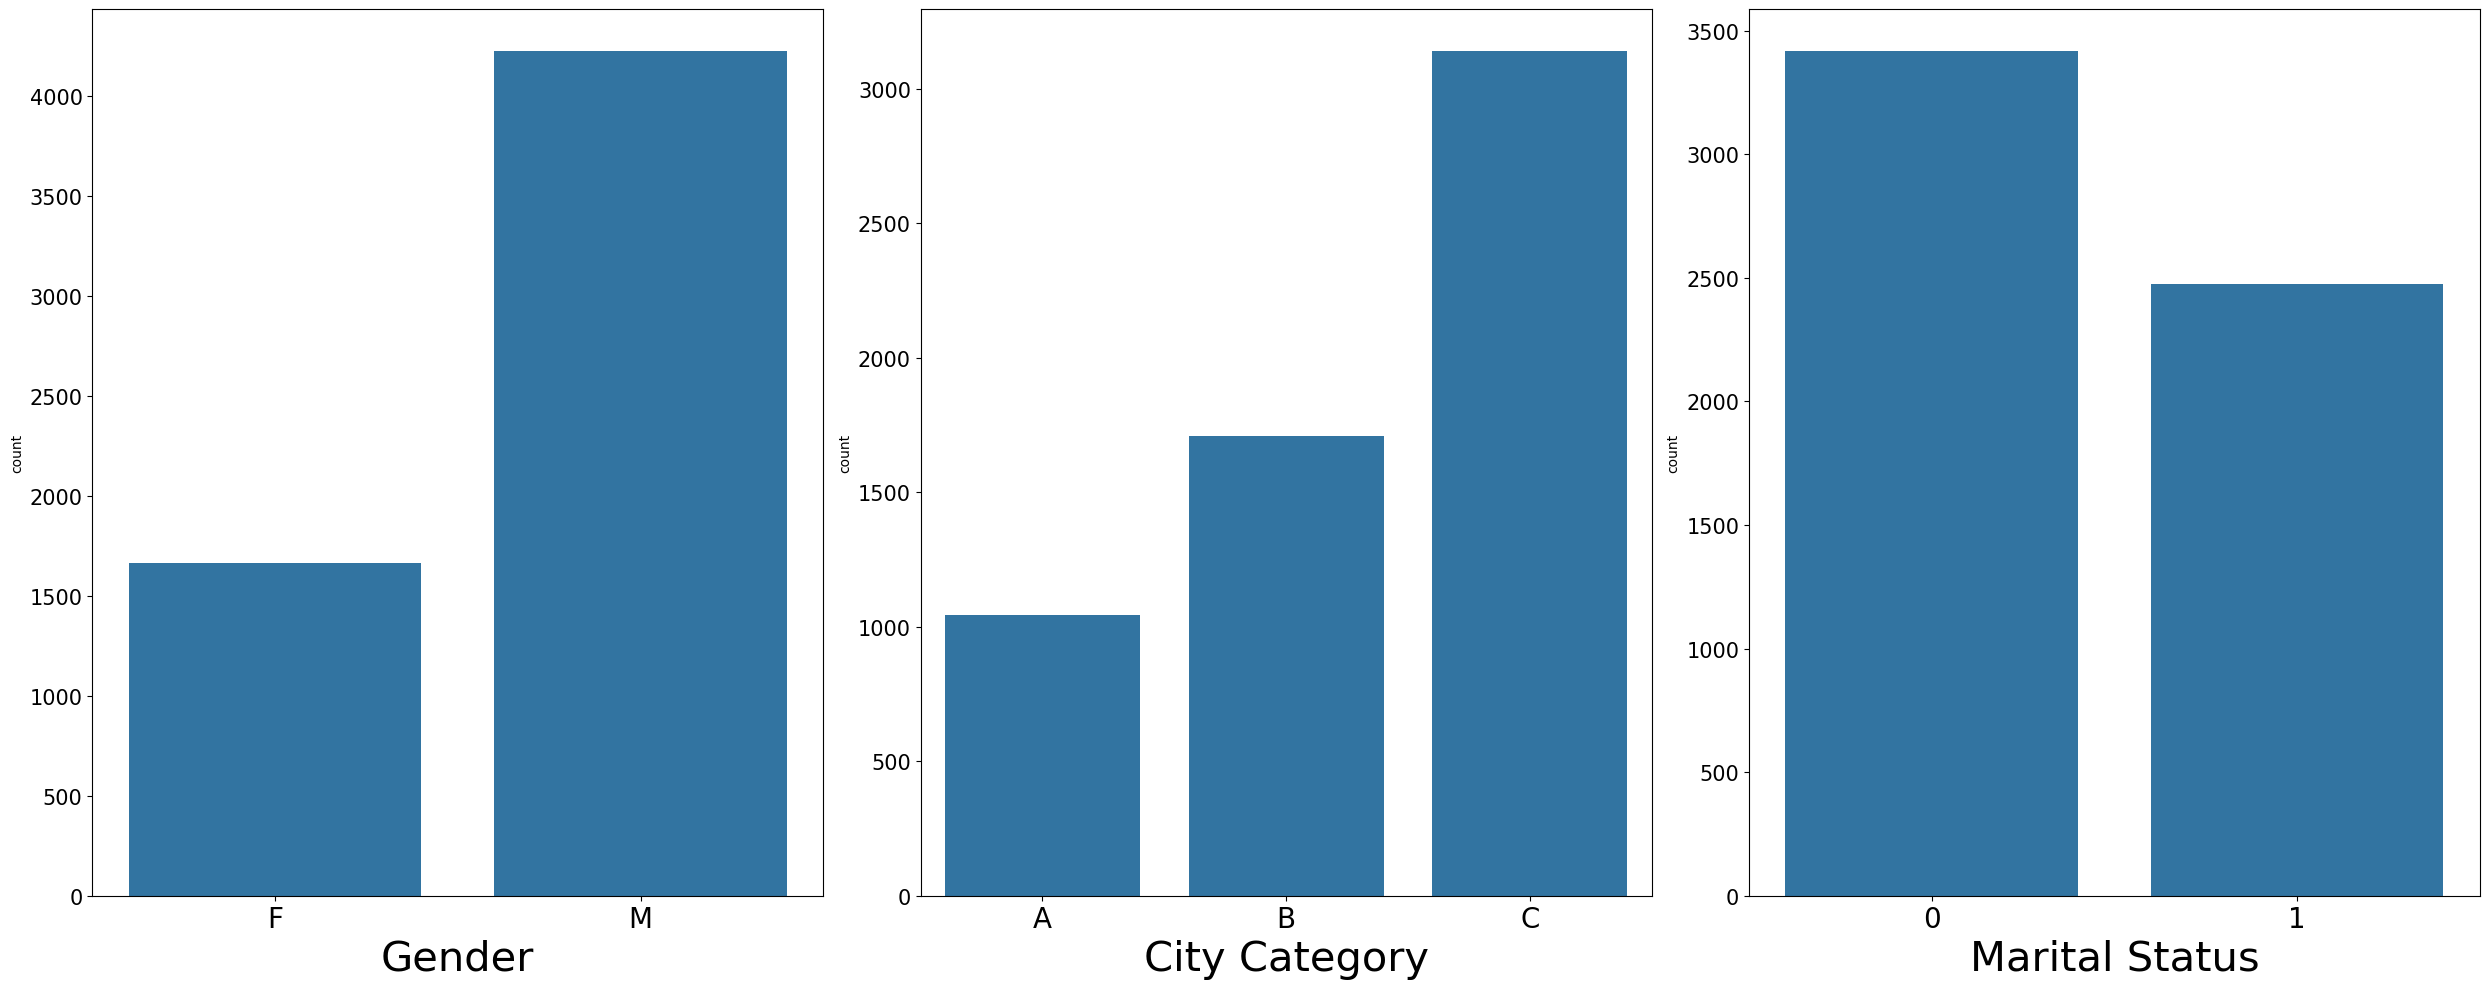

In [16]:
count, ax = plt.subplots(1,3, figsize=(25, 10))
sns.countplot(data=df_uniq, x='Gender', ax=ax[0])
ax[0].set_xlabel('Gender', fontsize=30)
sns.countplot(data=df_uniq, x='City_Category', ax=ax[1], order=['A','B','C'])
ax[1].set_xlabel('City Category', fontsize=30)
sns.countplot(data=df_uniq, x='Marital_Status', ax=ax[2])
ax[2].set_xlabel('Marital Status', fontsize=30)
for axis in ax:
    axis.tick_params(axis='x', labelsize=20)
    axis.tick_params(axis='y', labelsize=15)
count.set_tight_layout(True)
plt.show()

1. 남성인 회원이 2배이상 많다
2. C가 가장 큰 도시로 추정
3. 미혼인 회원 기혼인 회원보다 많다

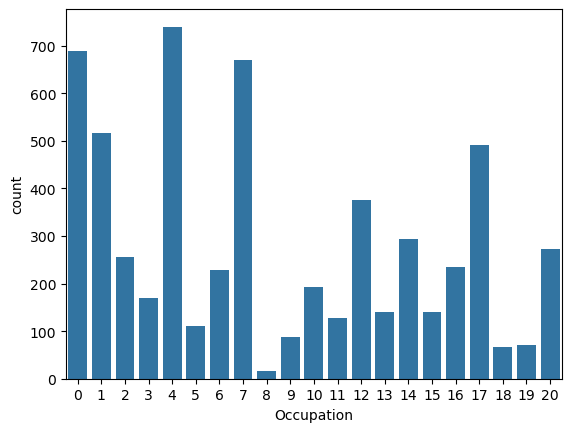

In [17]:
sns.countplot(data=df_uniq, x='Occupation')
plt.show()

1. 4, 0, 7 직업이 가장 많다
2. 8 직업이 가장 적다

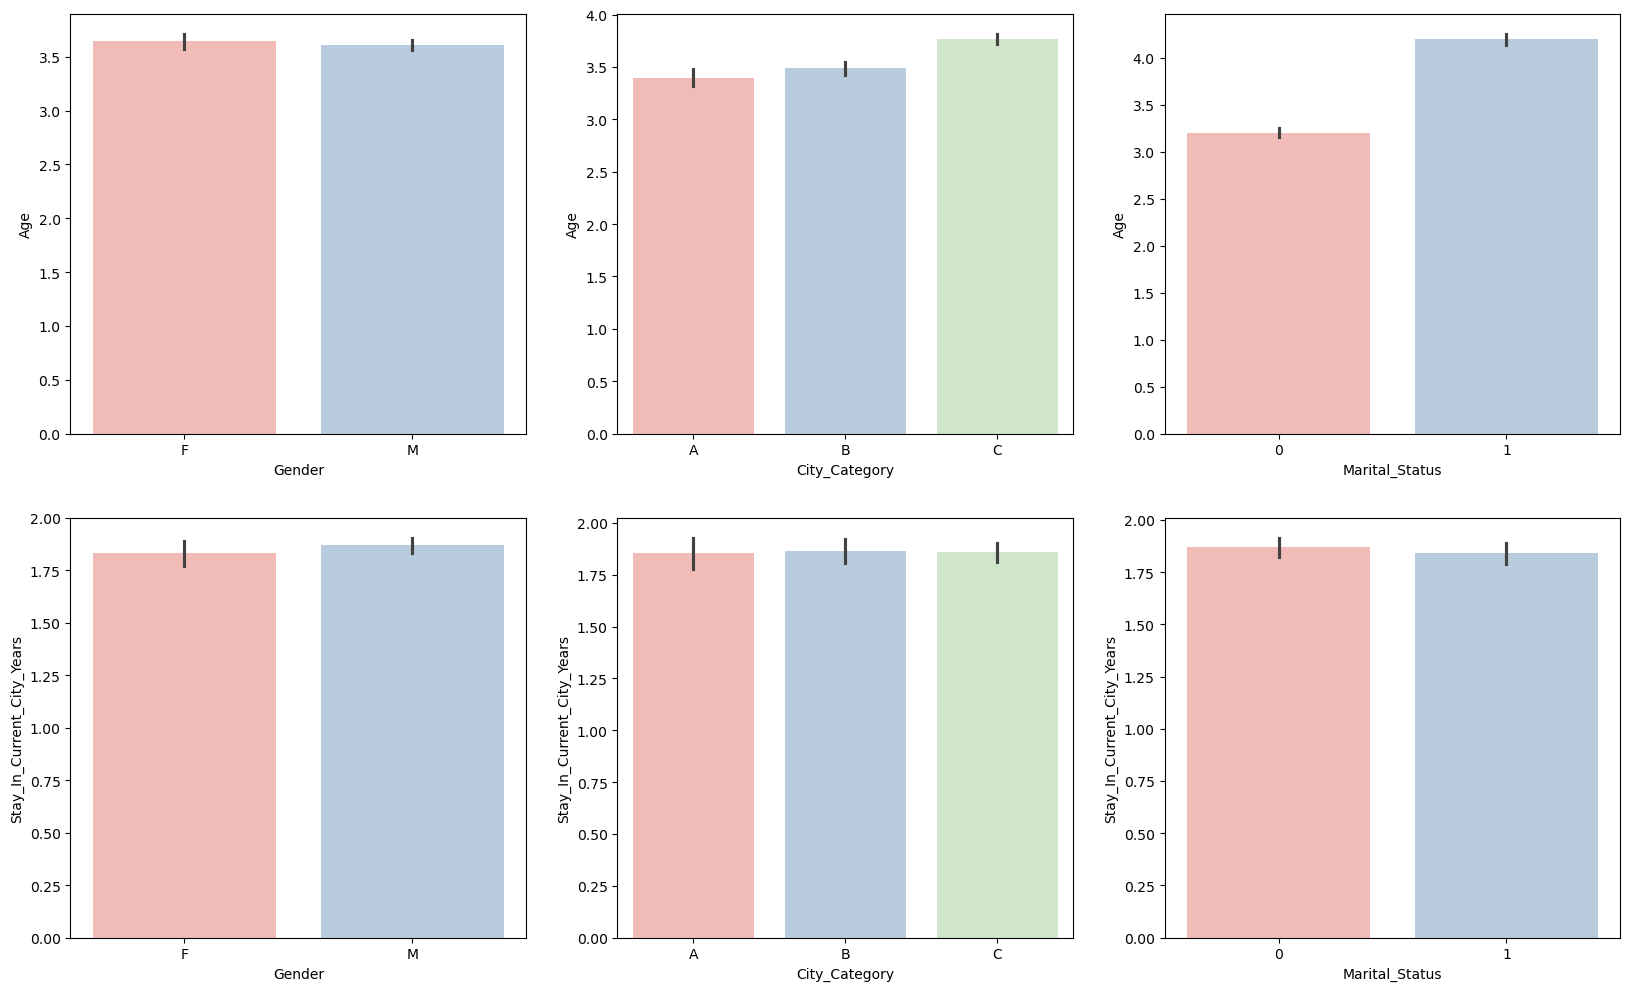

In [18]:
bar, ax = plt.subplots(2, 3, figsize=(20, 12))
sns.barplot(data=df_uniq_age, x='Gender', y='Age', estimator=np.mean, ax=ax[0,0], palette='Pastel1')
sns.barplot(data=df_uniq, x='Gender', y='Stay_In_Current_City_Years', estimator=np.mean, ax=ax[1,0], palette='Pastel1')
sns.barplot(data=df_uniq_age, x='City_Category', y='Age', estimator=np.mean, ax=ax[0,1], palette='Pastel1', order=['A','B','C'])
sns.barplot(data=df_uniq, x='City_Category', y='Stay_In_Current_City_Years', estimator=np.mean, ax=ax[1,1], palette='Pastel1', order=['A','B','C'])
sns.barplot(data=df_uniq_age, x='Marital_Status', y='Age', estimator=np.mean, ax=ax[0,2], palette='Pastel1')
sns.barplot(data=df_uniq, x='Marital_Status', y='Stay_In_Current_City_Years', estimator=np.mean, ax=ax[1,2], palette='Pastel1')
#나이 기준 : {'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7}
plt.show()

1. 성별 간 연령과 각각의 도시에 지낸 기간의 평균은 거의 비슷하다.
2. C 도시가 다른 두 도시에 비해 연령대가 있는 편이고 3도시 모두 각각의 도시에서 지낸 기간의 평균이 비슷하다.
3. 기혼인 회원의 연령대가 미혼인 회원보다 유의미하게 많은 편이고 미혼, 기혼 회원 모두 각각의 도시에서 지낸 기간의 평균이 비슷하다.

In [113]:
df_uniq_age.Age.unique(), df_uniq_fair_age.Age.unique()

(array([1, 7, 3, 5, 6, 4, 2], dtype=int64),
 array([1, 6, 3, 5, 4, 2], dtype=int64))

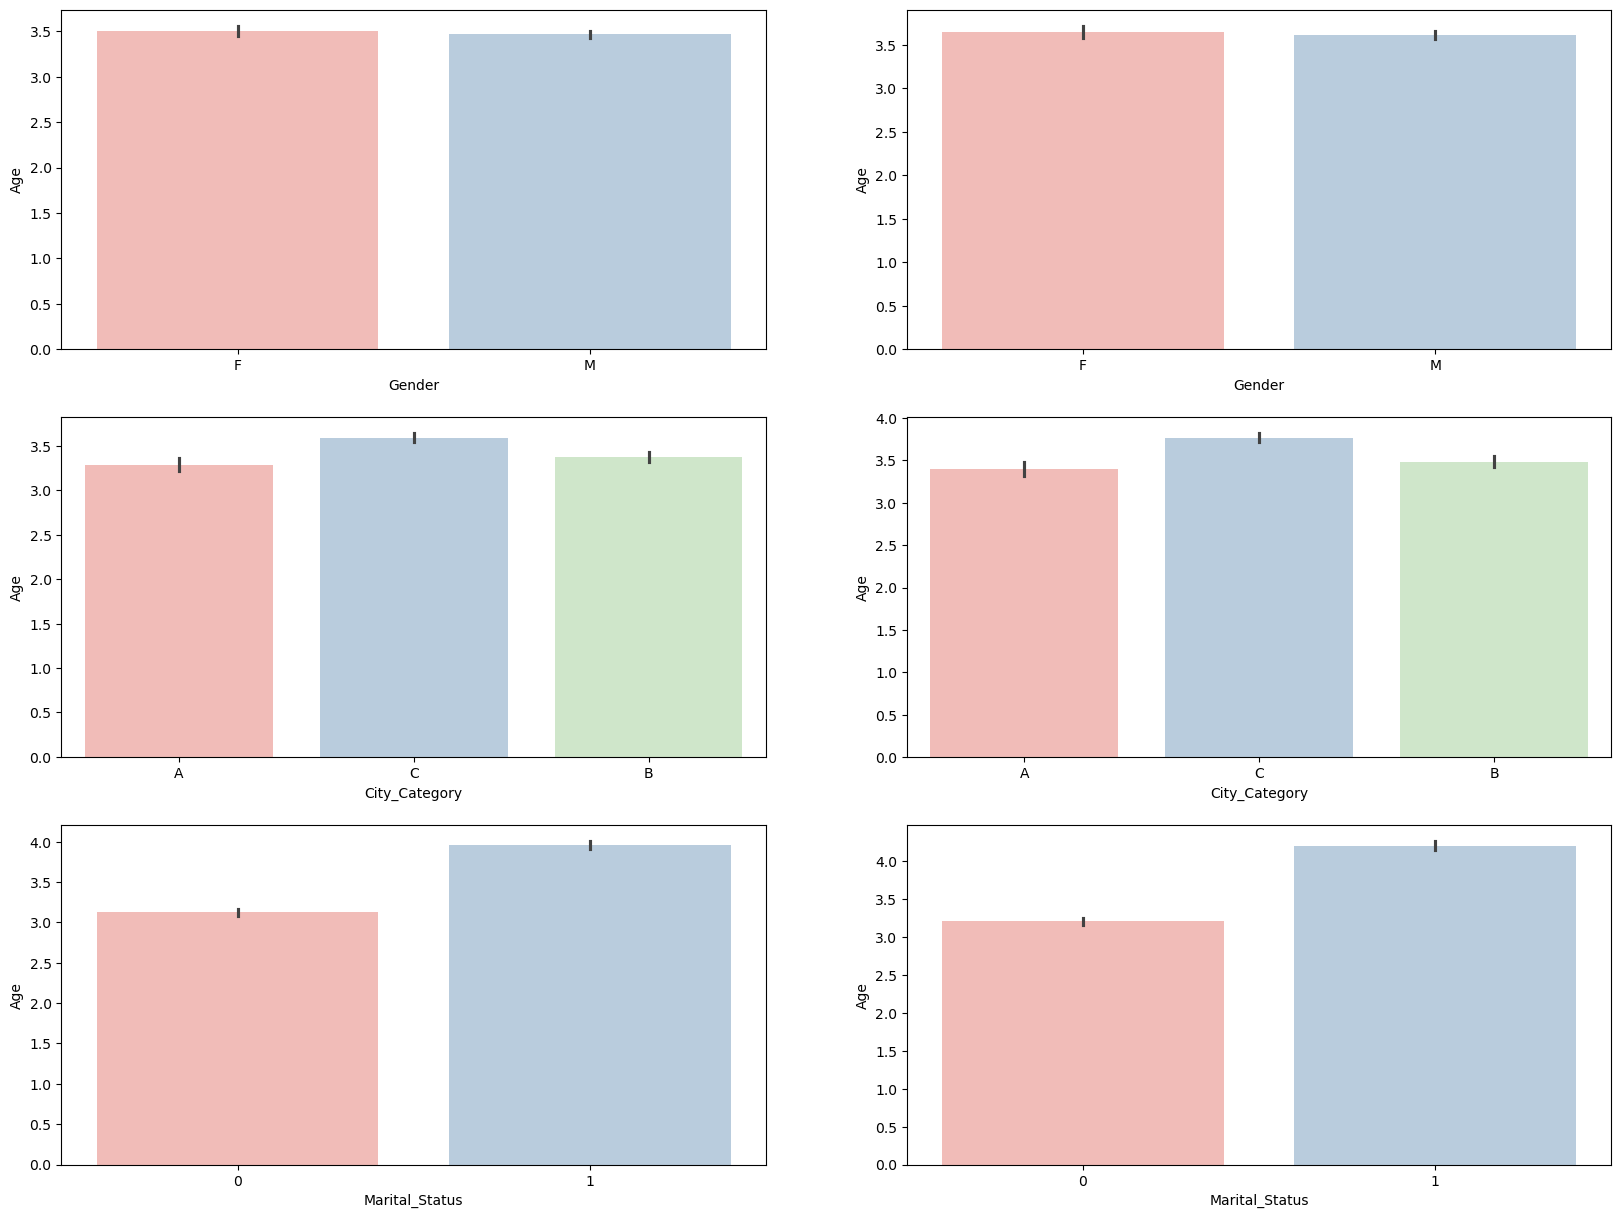

In [19]:
bar, ax = plt.subplots(3, 2, figsize=(20, 15))
sns.barplot(data=df_uniq_fair_age, x='Gender', y='Age', estimator=np.mean, ax=ax[0,0], palette='Pastel1')
sns.barplot(data=df_uniq_age, x='Gender', y='Age', estimator=np.mean, ax=ax[0,1], palette='Pastel1')
sns.barplot(data=df_uniq_fair_age, x='City_Category', y='Age', estimator=np.mean, ax=ax[1,0], palette='Pastel1')
sns.barplot(data=df_uniq_age, x='City_Category', y='Age', estimator=np.mean, ax=ax[1,1], palette='Pastel1')
sns.barplot(data=df_uniq_fair_age, x='Marital_Status', y='Age', estimator=np.mean, ax=ax[2,0], palette='Pastel1')
sns.barplot(data=df_uniq_age, x='Marital_Status', y='Age', estimator=np.mean, ax=ax[2,1], palette='Pastel1')
#나이 기준을 다르게 해도 크게 차이가 없다
plt.show()

1. 51세에서 55세를 46세에서 50세에 합친 것이 크게 차이가 없다.

In [20]:
df_purchase = df.copy()
df_purchase = df_purchase[['User_ID','Purchase']]
df_purchase.groupby('User_ID').sum()

,Purchase
User_ID,
1000001,334093
1000002,810472
1000003,341635
1000004,206468
1000005,821001
...,...
1006036,4116058
1006037,1119538
1006038,90034


In [21]:
df_uniq_index['Purchase'] = df_purchase.groupby('User_ID').sum()
print(df_uniq_index.loc[1006040])
df_uniq_index
df_uniq_index['Purchase'].max()

Gender                              M
Age                             26-35
Occupation                          6
City_Category                       B
Stay_In_Current_City_Years          2
Marital_Status                      0
Purchase                      1653299
Name: 1006040, dtype: object


10536909

In [22]:
df.User_ID.value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

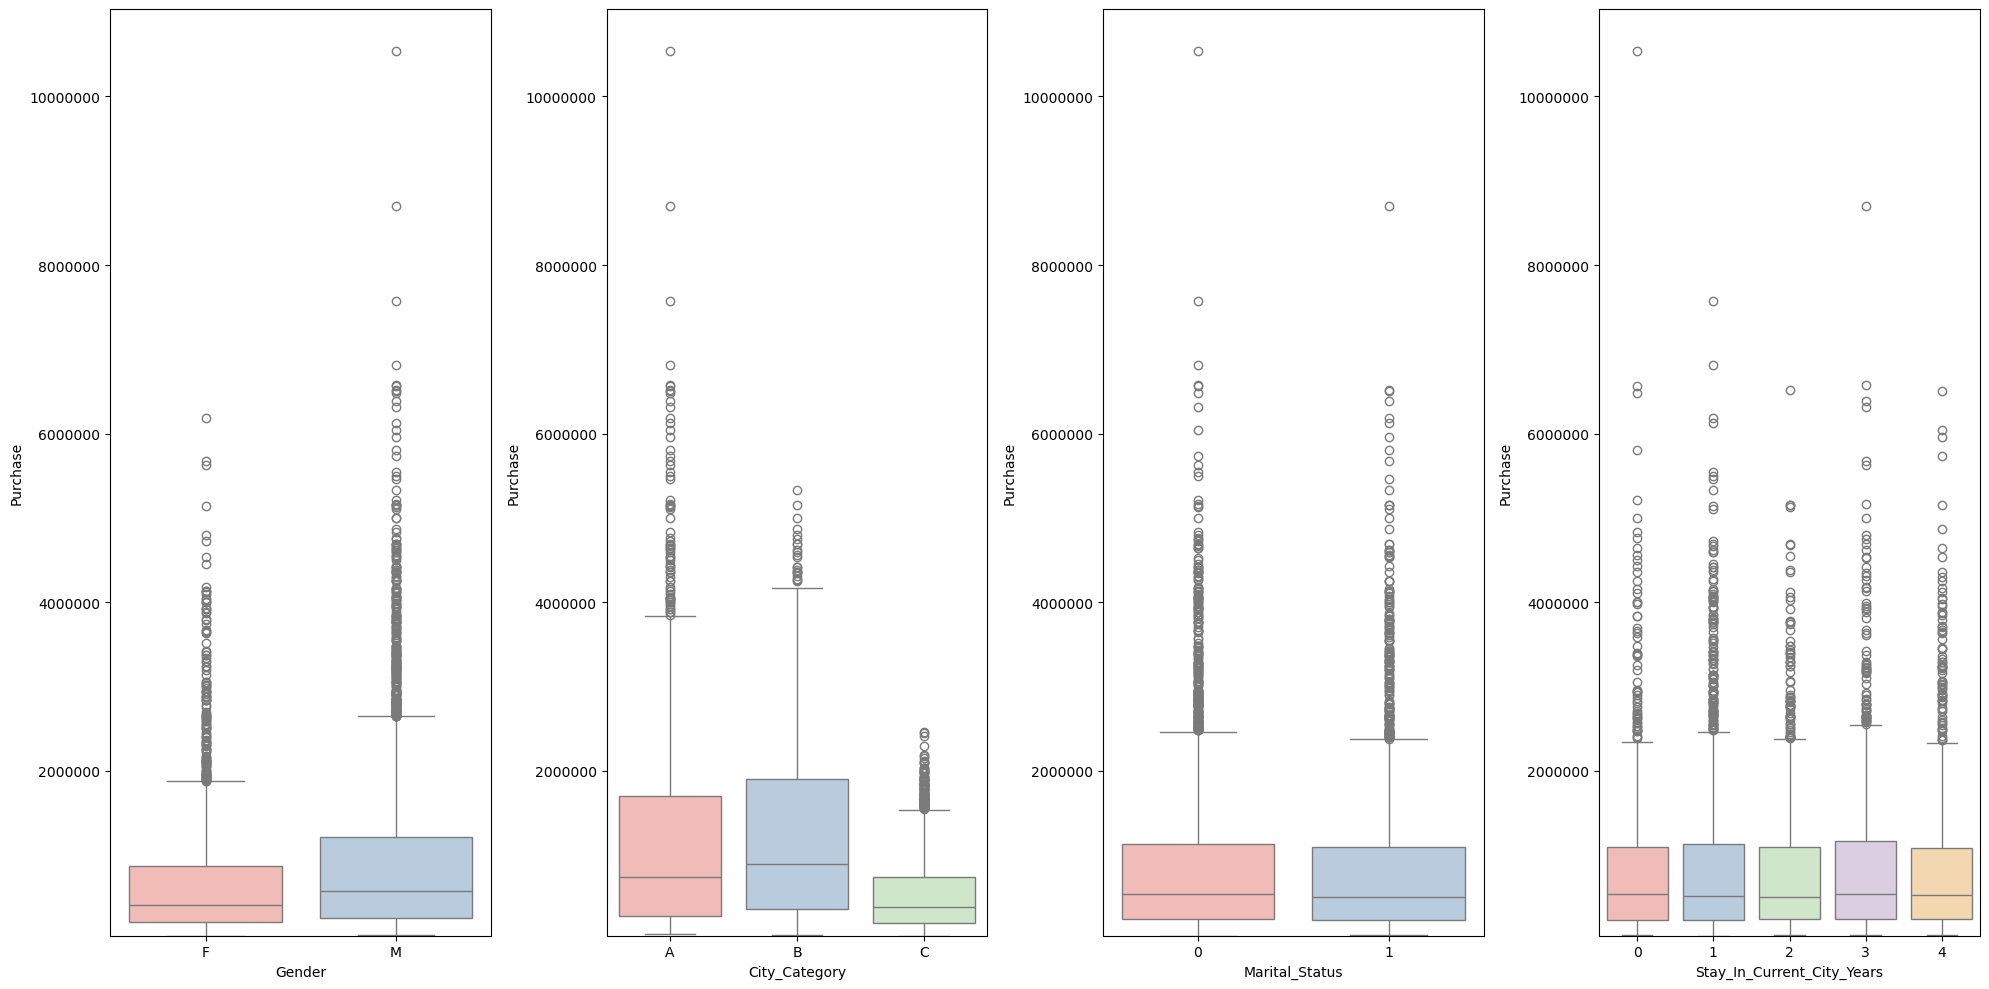

In [115]:
box, ax = plt.subplots(1, 4, figsize=(20, 10))
sns.boxplot(data=df_uniq_index, x='Gender', y='Purchase', ax=ax[0], palette='Pastel1')
sns.boxplot(data=df_uniq_index, x='City_Category', y='Purchase', ax=ax[1], palette='Pastel1', order=['A','B','C'])
sns.boxplot(data=df_uniq_index, x='Marital_Status', y='Purchase', ax=ax[2], palette='Pastel1')
sns.boxplot(data=df_uniq_index, x='Stay_In_Current_City_Years', y='Purchase', ax=ax[3], palette='Pastel1')
def format_func(value, tick_number):
    return int(value)
for a in ax:
    a.set_ylim(df_uniq_index['Purchase'].min(), df_uniq_index['Purchase'].max()+500000)
    a.yaxis.set_major_locator(plt.AutoLocator())
    a.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
box.set_tight_layout(True)
plt.show()

1. 남성 개개인의 구매력이 여성보다 높은 것으로 보임
2. C도시에 회원이 가장 많지만 개개인의 구매력은 가장 떨어진다.
3. B 도시가 전체적인 개개인의 구매력은 높지만 A도시에 개개인의 구매력이 현저하게 높은 VIP 고객들이 많이 위치한 것으로 보임
4. 미혼인 회원이 더 많았지만 개개인의 구매력은 기혼인 회원가 비슷한 것으로 보임
5. 도시에 지낸 기간이 개개인의 구매력에는 크게 차지 하지 않는 것으로 보임

In [27]:
df_uniq_age_index = df_uniq_age.copy()
df_uniq_age_index = df_uniq_age_index.set_index('User_ID')
df_uniq_age_index['Purchase'] = df_purchase.groupby('User_ID').sum()
df_uniq_fair_age_index = df_uniq_fair_age.copy()
df_uniq_fair_age_index = df_uniq_fair_age_index.set_index('User_ID')
df_uniq_fair_age_index['Purchase'] = df_purchase.groupby('User_ID').sum()
print(df_uniq_fair_age_index.Age.unique(), df_uniq_age_index.Age.unique())
df_uniq_fair_age_index


[1 6 3 5 4 2] [1 7 3 5 6 4 2]


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,1,10,A,2,0,334093
1000002,M,6,16,C,4,0,810472
1000003,M,3,15,A,3,0,341635
1000004,M,5,7,B,2,1,206468
1000005,M,3,20,A,1,1,821001
...,...,...,...,...,...,...,...
1004588,F,3,4,C,0,0,140990
1004871,M,2,12,C,2,0,108545
1004113,M,4,17,C,3,0,213550


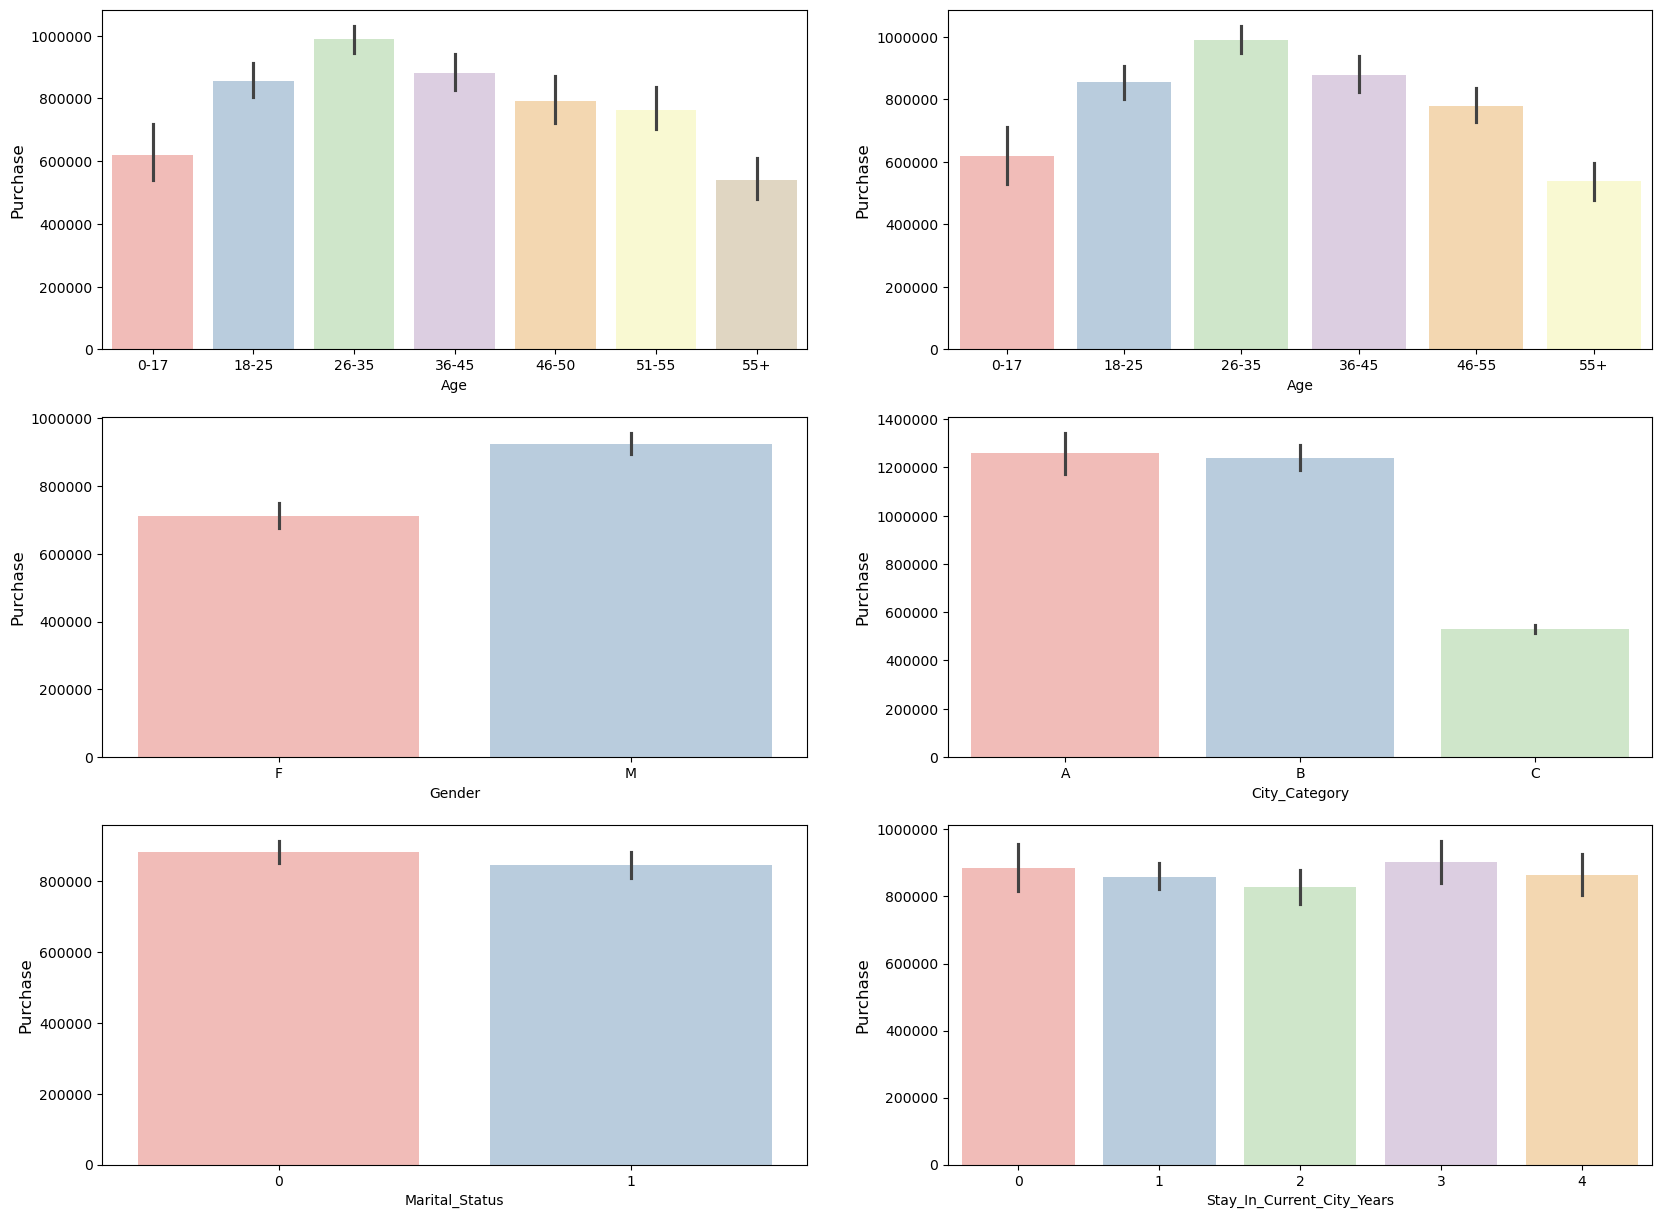

In [114]:
bar, ax = plt.subplots(3, 2, figsize=(20, 15))
sns.barplot(data=df_uniq_age_index, x='Age', y='Purchase', estimator=np.mean, ax=ax[0,0], palette='Pastel1')
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
ax[0,0].set_xticklabels(age_labels)
sns.barplot(data=df_uniq_fair_age_index, x='Age', y='Purchase', estimator=np.mean, ax=ax[0,1], palette='Pastel1')
age_labels1 = ['0-17', '18-25', '26-35', '36-45', '46-55', '55+']
ax[0,1].set_xticklabels(age_labels1)
sns.barplot(data=df_uniq_age_index, x='Gender', y='Purchase', estimator=np.mean, ax=ax[1,0], palette='Pastel1')
sns.barplot(data=df_uniq_age_index, x='City_Category', y='Purchase', estimator=np.mean, ax=ax[1,1], palette='Pastel1', order=['A','B','C'])
sns.barplot(data=df_uniq_age_index, x='Marital_Status', y='Purchase', estimator=np.mean, ax=ax[2,0], palette='Pastel1')
sns.barplot(data=df_uniq_age_index, x='Stay_In_Current_City_Years', y='Purchase', estimator=np.mean, ax=ax[2,1], palette='Pastel1')
def format_func(value, tick_number):
    return int(value)

for i in range(3):
    for j in range(2):
        ax[i,j].yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ax[i,j].set_ylabel('Purchase', fontsize=12)
plt.show()

1. 평균적으로 26-35세의 구매력이 가장 높고 55세 이상과 0-17세의 구매력이 가장 낮은편
2. 남성의 평균 구매력이 여성보다 높은 것을 다시 알 수 있다.
3. C 도시의 평균 구매력이 현저히 떨어지는 것을 다시 알 수 있다.
4. 미혼과 기혼인 회원의 평균 구매력이 크게 차이나지 않는 것을 다시 알 수 있다
5. 도시에 머문 기간에 평균적인 구매력에 크게 영향을 미치지 않는 것을 알 수 있다.

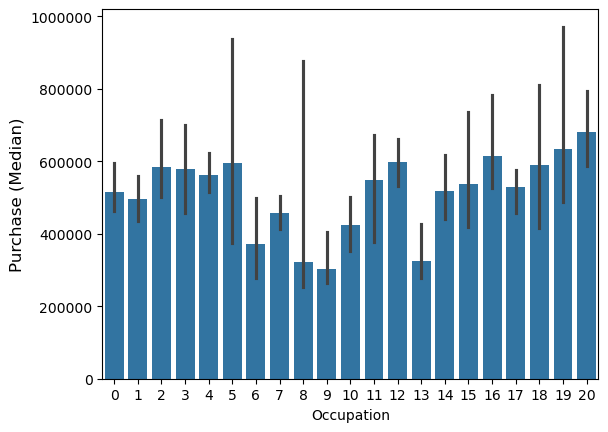

In [29]:
ax = sns.barplot(data=df_uniq_age_index, x='Occupation', y='Purchase', estimator=np.median)
def format_func(value, tick_number):
    return int(value)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.ylabel('Purchase (Median)', fontsize=12)
plt.show()

1. 직업별 소득이 크게 차이나 구매력에도 큰 편차가 있을 것으로 예상했기 때문에 median 값으로 봤다.
2. 20번 직업의 구매력이 가장 뛰어남
3. 9번과 13번의 구매력이 가장 낮음
4. 8번의 구매력이 편차가 가장 심한 것으로 보임

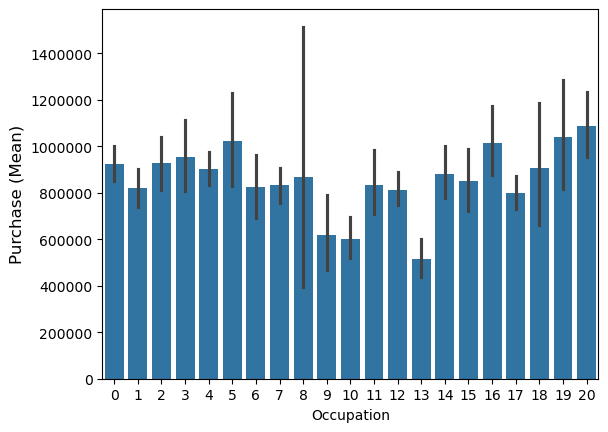

In [30]:
ax = sns.barplot(data=df_uniq_age_index, x='Occupation', y='Purchase', estimator=np.mean)
def format_func(value, tick_number):
    return int(value)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.ylabel('Purchase (Mean)', fontsize=12)
plt.show()

In [31]:
sorted_purchase_df = df_uniq_age_index.copy()
sorted_purchase_df = sorted_purchase_df.sort_values(by='Purchase', ascending=False)
sorted_purchase_df.head(30)
filtered_vip_df = sorted_purchase_df.head(300)
filtered_vvip_df = sorted_purchase_df.head(30)
filtered_vip_df, filtered_vvip_df

(        Gender  Age  Occupation City_Category  Stay_In_Current_City_Years  \
 User_ID                                                                     
 1004277      M    4          16             A                           0   
 1001680      M    3          20             A                           3   
 1002909      M    3           7             A                           1   
 1001941      M    4          17             A                           1   
 1000424      M    3          17             A                           3   
 ...        ...  ...         ...           ...                         ...   
 1003892      M    3          20             A                           0   
 1000438      M    2          11             A                           3   
 1000308      M    3           2             A                           3   
 1000048      M    3           4             B                           3   
 1003499      M    3           3             A                  

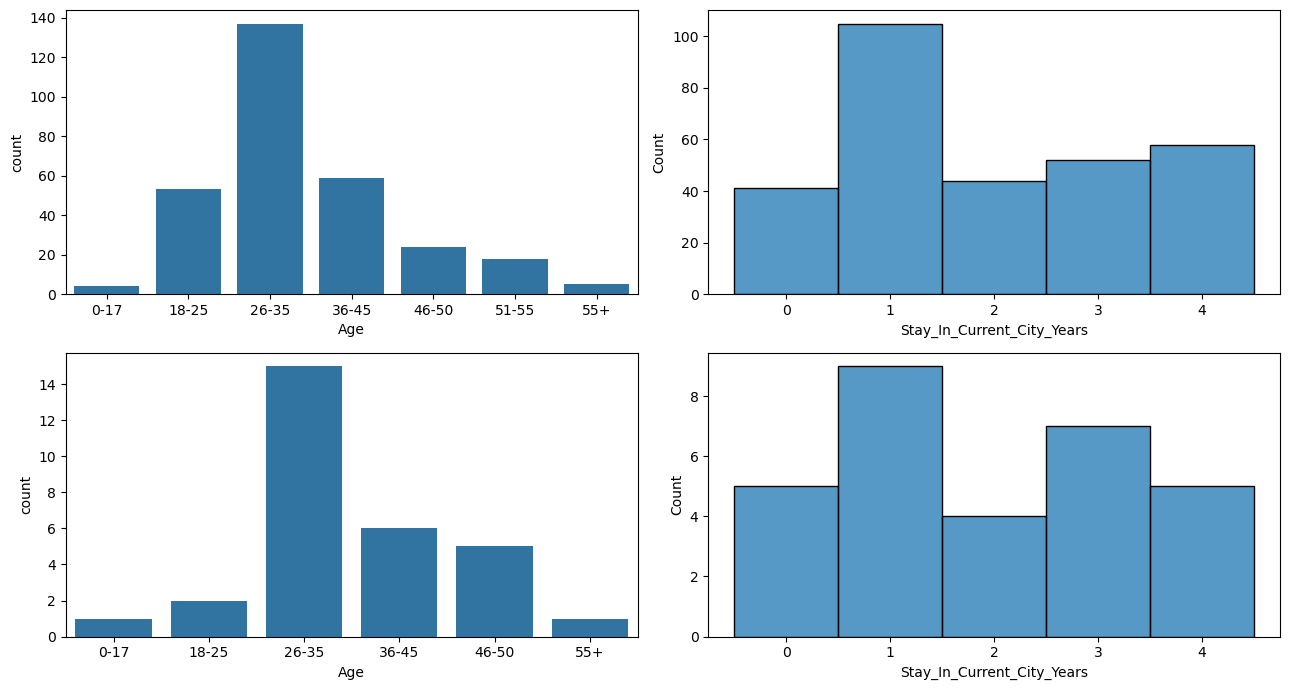

In [32]:
hist, ax = plt.subplots(2,2, figsize=(13, 7))
sns.countplot(data=filtered_vip_df, x='Age', ax = ax[0,0])
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
ax[0,0].set_xticklabels(age_labels)
sns.histplot(data=filtered_vip_df, x='Stay_In_Current_City_Years', ax = ax[0,1], discrete=True)

sns.countplot(data=filtered_vvip_df, x='Age', ax = ax[1,0])
age_labels2 = ['0-17', '18-25', '26-35', '36-45', '46-50', '55+']
ax[1,0].set_xticklabels(age_labels2)
sns.histplot(data=filtered_vvip_df, x='Stay_In_Current_City_Years', ax = ax[1,1], discrete=True)
hist.set_tight_layout(True)
plt.show()

1. 300명인 vip로 봤을 때 26-35세가 가장 많았고 다음으로 36-45세, 18-25세가 많았다
2. 30명인 vvip로 봤을 때 26-35세가 현저하게 많았고 다음으로 36-45세, 46-50세가 많았다.
3. vvip와 vip는 도시에서 1년 거주자가 가장 많았다.

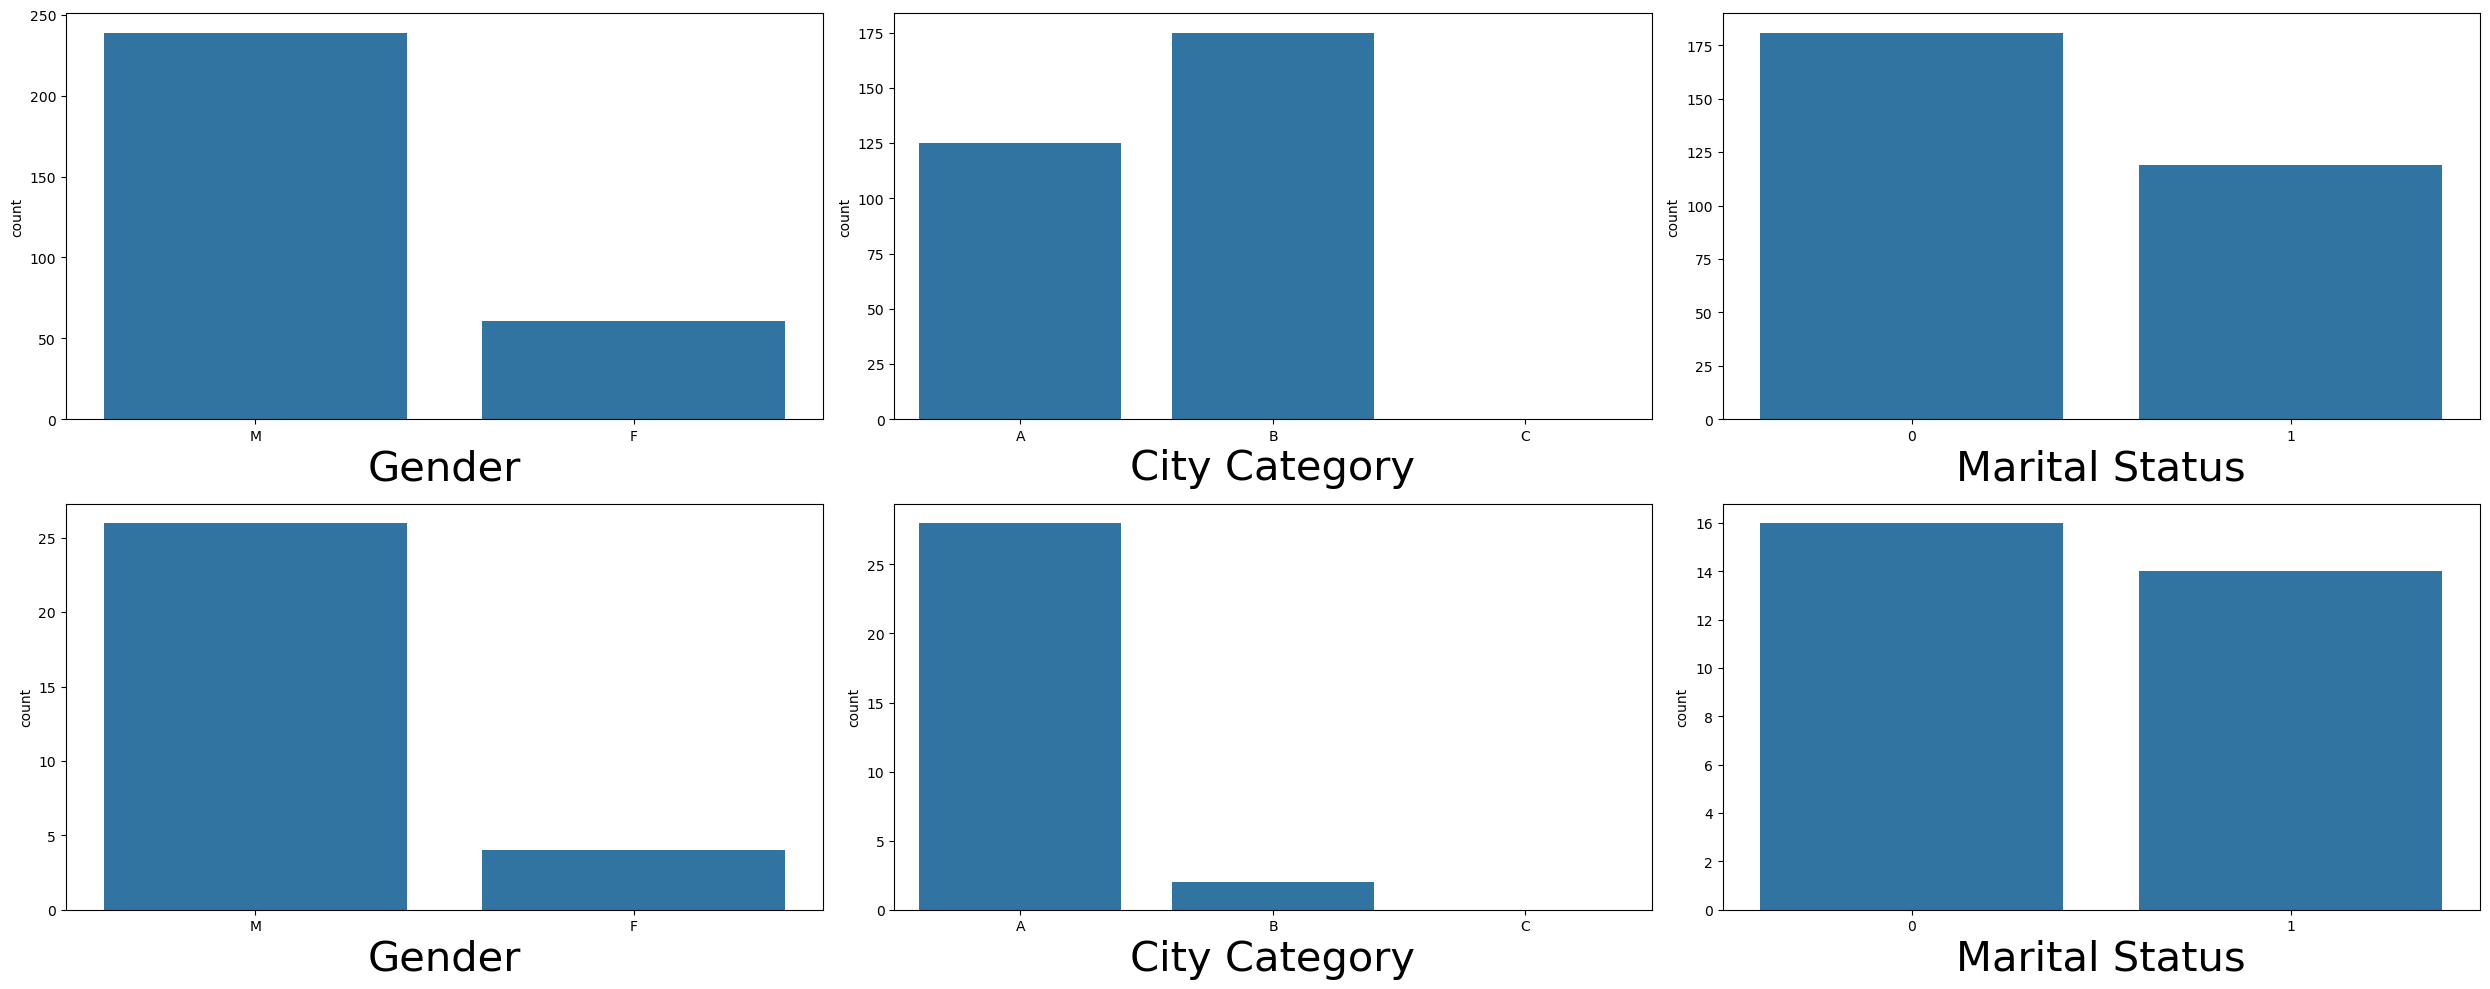

In [33]:
count, ax = plt.subplots(2,3, figsize=(25, 10))
sns.countplot(data=filtered_vip_df, x='Gender', ax=ax[0,0])
ax[0,0].set_xlabel('Gender', fontsize=30)
sns.countplot(data=filtered_vip_df, x='City_Category', ax=ax[0,1], order=['A','B','C'])
ax[0,1].set_xlabel('City Category', fontsize=30)
sns.countplot(data=filtered_vip_df, x='Marital_Status', ax=ax[0,2])
ax[0,2].set_xlabel('Marital Status', fontsize=30)

sns.countplot(data=filtered_vvip_df, x='Gender', ax=ax[1,0])
ax[1,0].set_xlabel('Gender', fontsize=30)
sns.countplot(data=filtered_vvip_df, x='City_Category', ax=ax[1,1], order=['A','B','C'])
ax[1,1].set_xlabel('City Category', fontsize=30)
sns.countplot(data=filtered_vvip_df, x='Marital_Status', ax=ax[1,2])
ax[1,2].set_xlabel('Marital Status', fontsize=30)

count.set_tight_layout(True)
plt.show()

1. vip와 vvip는 남성이 훨씬 많다.
2. vip는 B 도시가 A 도시보다 많지만 VVIP는 A도시가 앞도적으로 많다
3. vip와 vvip 모두 미혼인 회원이 더 많다.

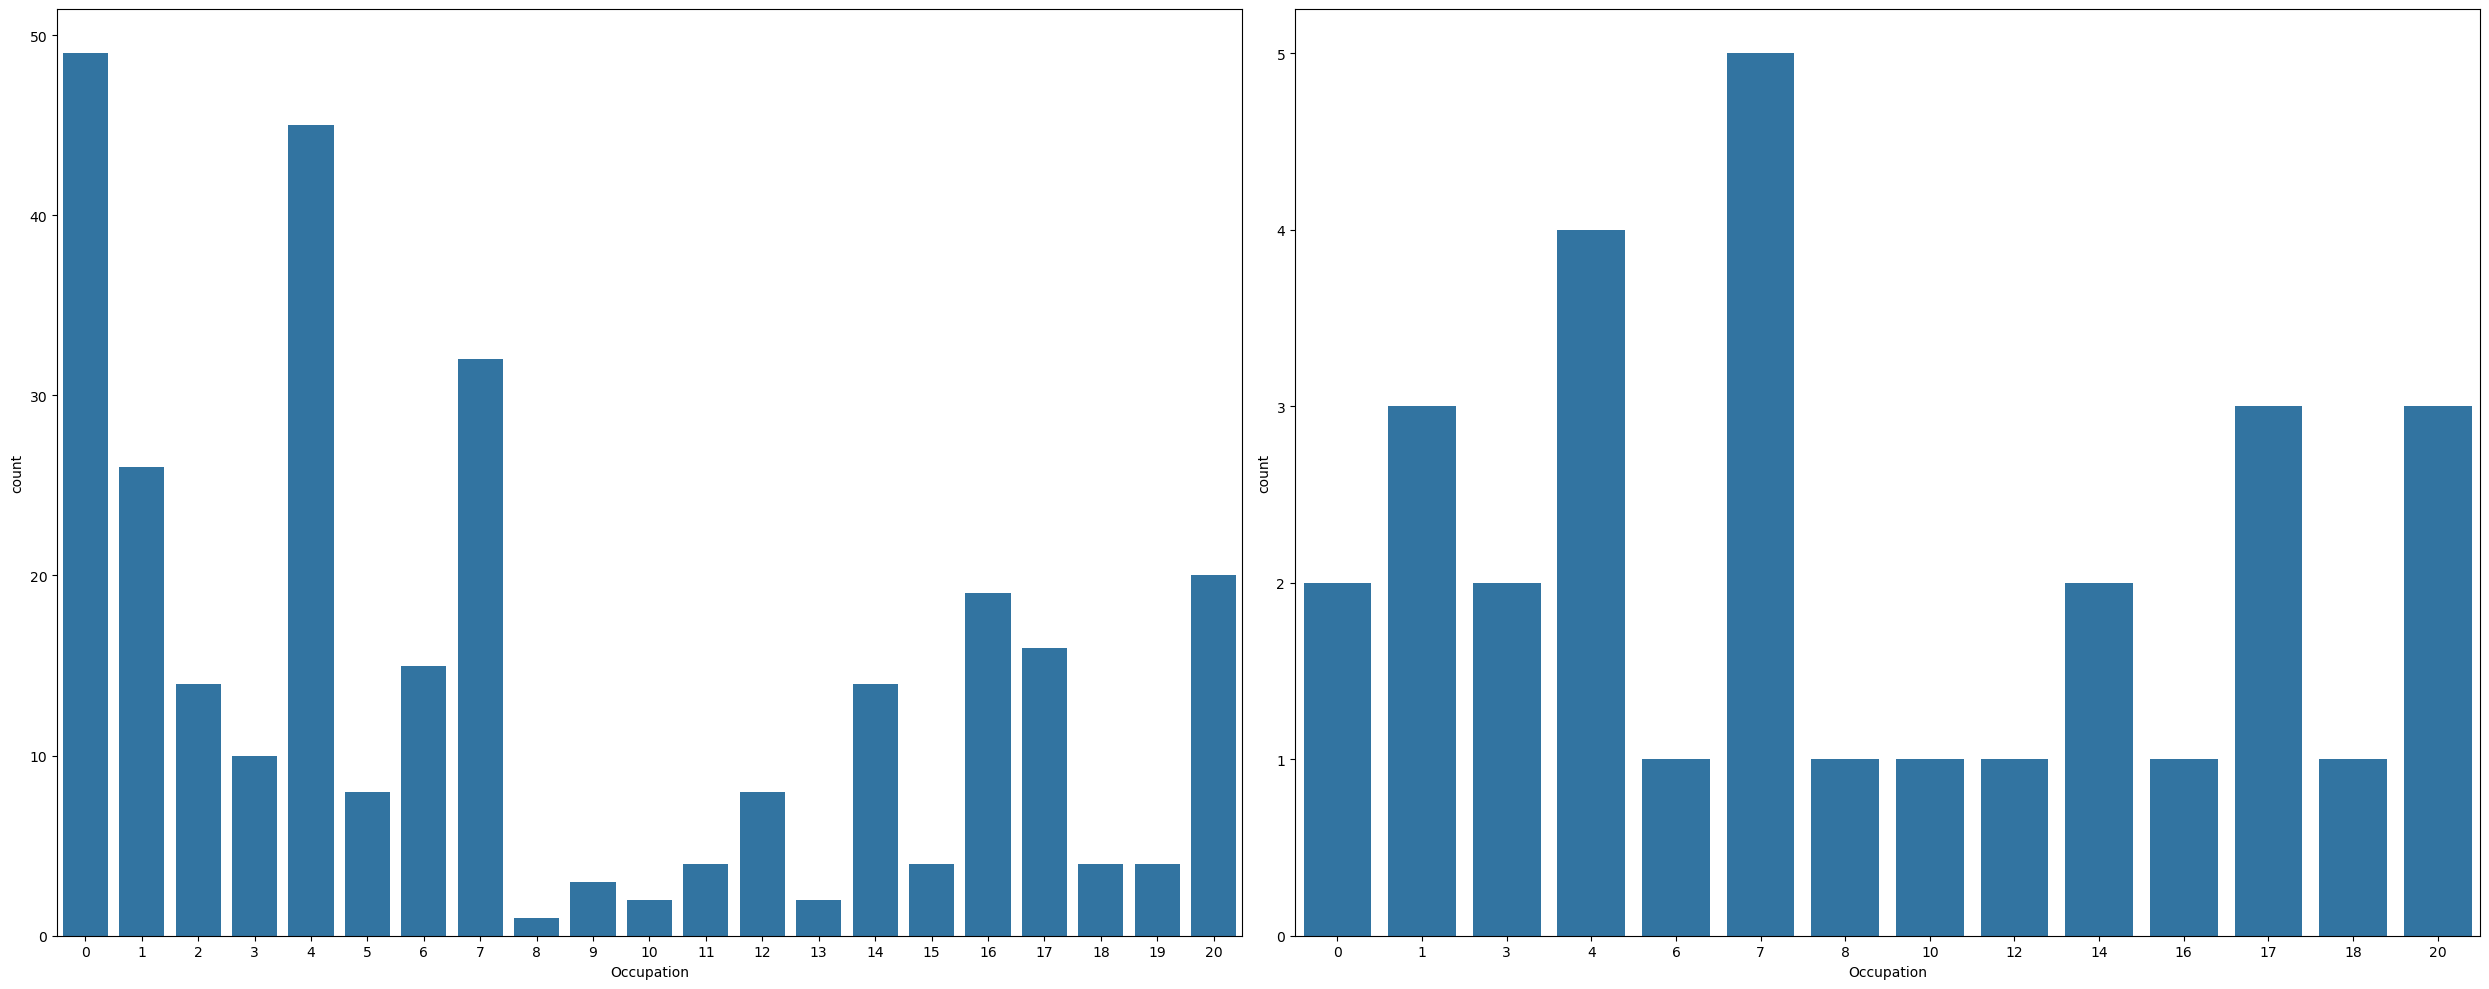

In [34]:
count, ax = plt.subplots(1,2, figsize=(25, 10))
sns.countplot(data=filtered_vip_df, x='Occupation', ax=ax[0])
sns.countplot(data=filtered_vvip_df, x='Occupation', ax=ax[1])
count.set_tight_layout(True)
plt.show()

1. vip는 0번과 4번 직업이 가장 많고 8번 직업이 가장 적다.
2. vvip는 7번 직업이 가장 많다

In [23]:
df_purchase_count = df_uniq_index.copy()
df_purchase_count['Purchase_Count'] = df.User_ID.value_counts()
df_purchase_count

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Purchase_Count
User_ID,,,,,,,,
1000001,F,0-17,10,A,2,0,334093,35
1000002,M,55+,16,C,4,0,810472,77
1000003,M,26-35,15,A,3,0,341635,29
1000004,M,46-50,7,B,2,1,206468,14
1000005,M,26-35,20,A,1,1,821001,106
...,...,...,...,...,...,...,...,...
1004588,F,26-35,4,C,0,0,140990,20
1004871,M,18-25,12,C,2,0,108545,12
1004113,M,36-45,17,C,3,0,213550,20


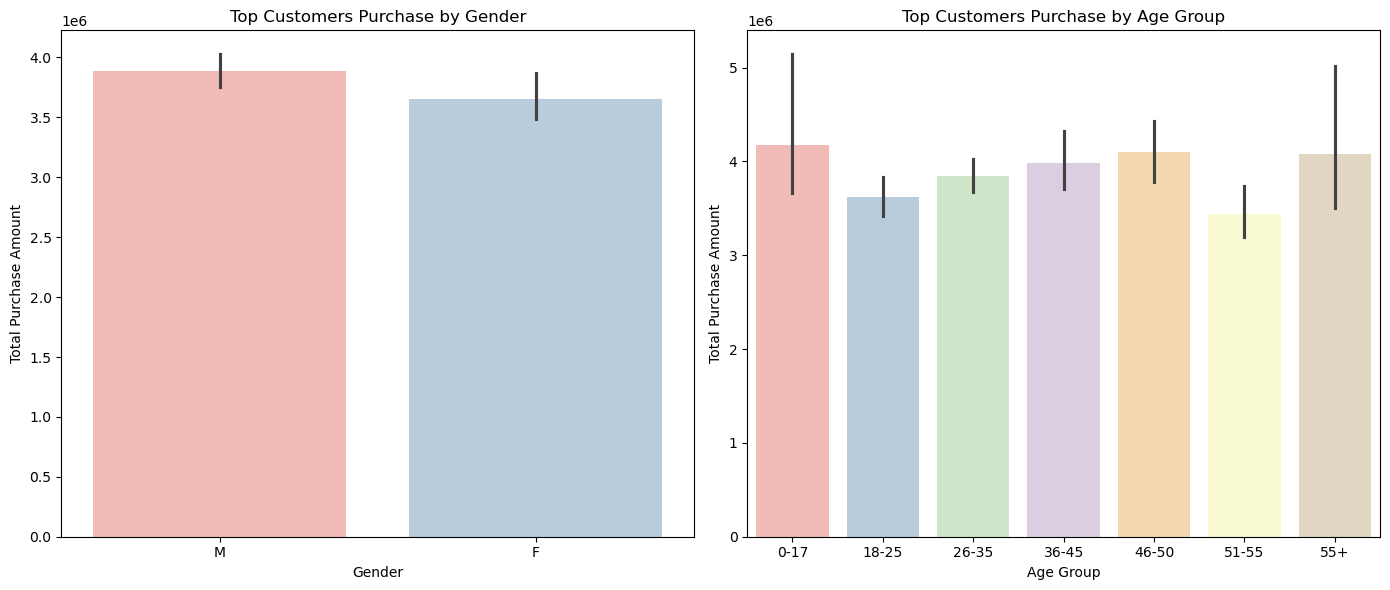

In [24]:
top_customers = df_purchase_count.nlargest(300, 'Purchase') # 상위 고객 수 조정 가능

# 특성 분석: Gender와 Age에 대한 특성 시각화
plt.figure(figsize=(14,6))

# 성별에 따른 구매 금액 차트
plt.subplot(1,2,1)
sns.barplot(x='Gender', y='Purchase', data=top_customers.reset_index(), palette='Pastel1')
plt.title('Top Customers Purchase by Gender')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Gender')

# 연령대에 따른 구매 금액 차트
plt.subplot(1,2,2)
sns.barplot(x='Age', y='Purchase', data=top_customers.reset_index(), palette='Pastel1', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Top Customers Purchase by Age Group')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Age Group')

plt.tight_layout()
plt.show()

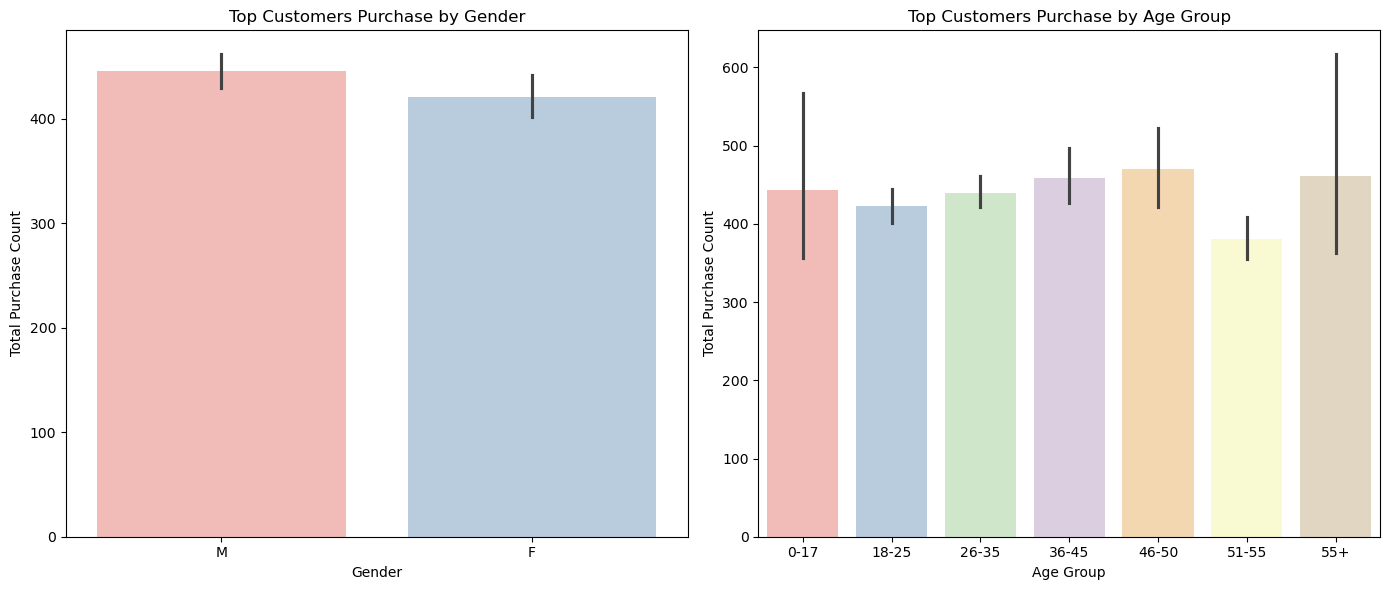

In [25]:
top_customers = df_purchase_count.nlargest(300, 'Purchase_Count') # 상위 고객 수 조정 가능

# 특성 분석: Gender와 Age에 대한 특성 시각화
plt.figure(figsize=(14,6))

# 성별에 따른 구매 금액 차트
plt.subplot(1,2,1)
sns.barplot(x='Gender', y='Purchase_Count', data=top_customers.reset_index(), palette='Pastel1')
plt.title('Top Customers Purchase by Gender')
plt.ylabel('Total Purchase Count')
plt.xlabel('Gender')

# 연령대에 따른 구매 금액 차트
plt.subplot(1,2,2)
sns.barplot(x='Age', y='Purchase_Count', data=top_customers.reset_index(), palette='Pastel1', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Top Customers Purchase by Age Group')
plt.ylabel('Total Purchase Count')
plt.xlabel('Age Group')

plt.tight_layout()
plt.show()

1. vip들의 평균으로 봤을 때 구매 횟수와 총 구매 금액은 남성과 여성이 비슷하다.
2. vip들의 연령별로 봤을 때도 평균은 비슷한 것으로 보임

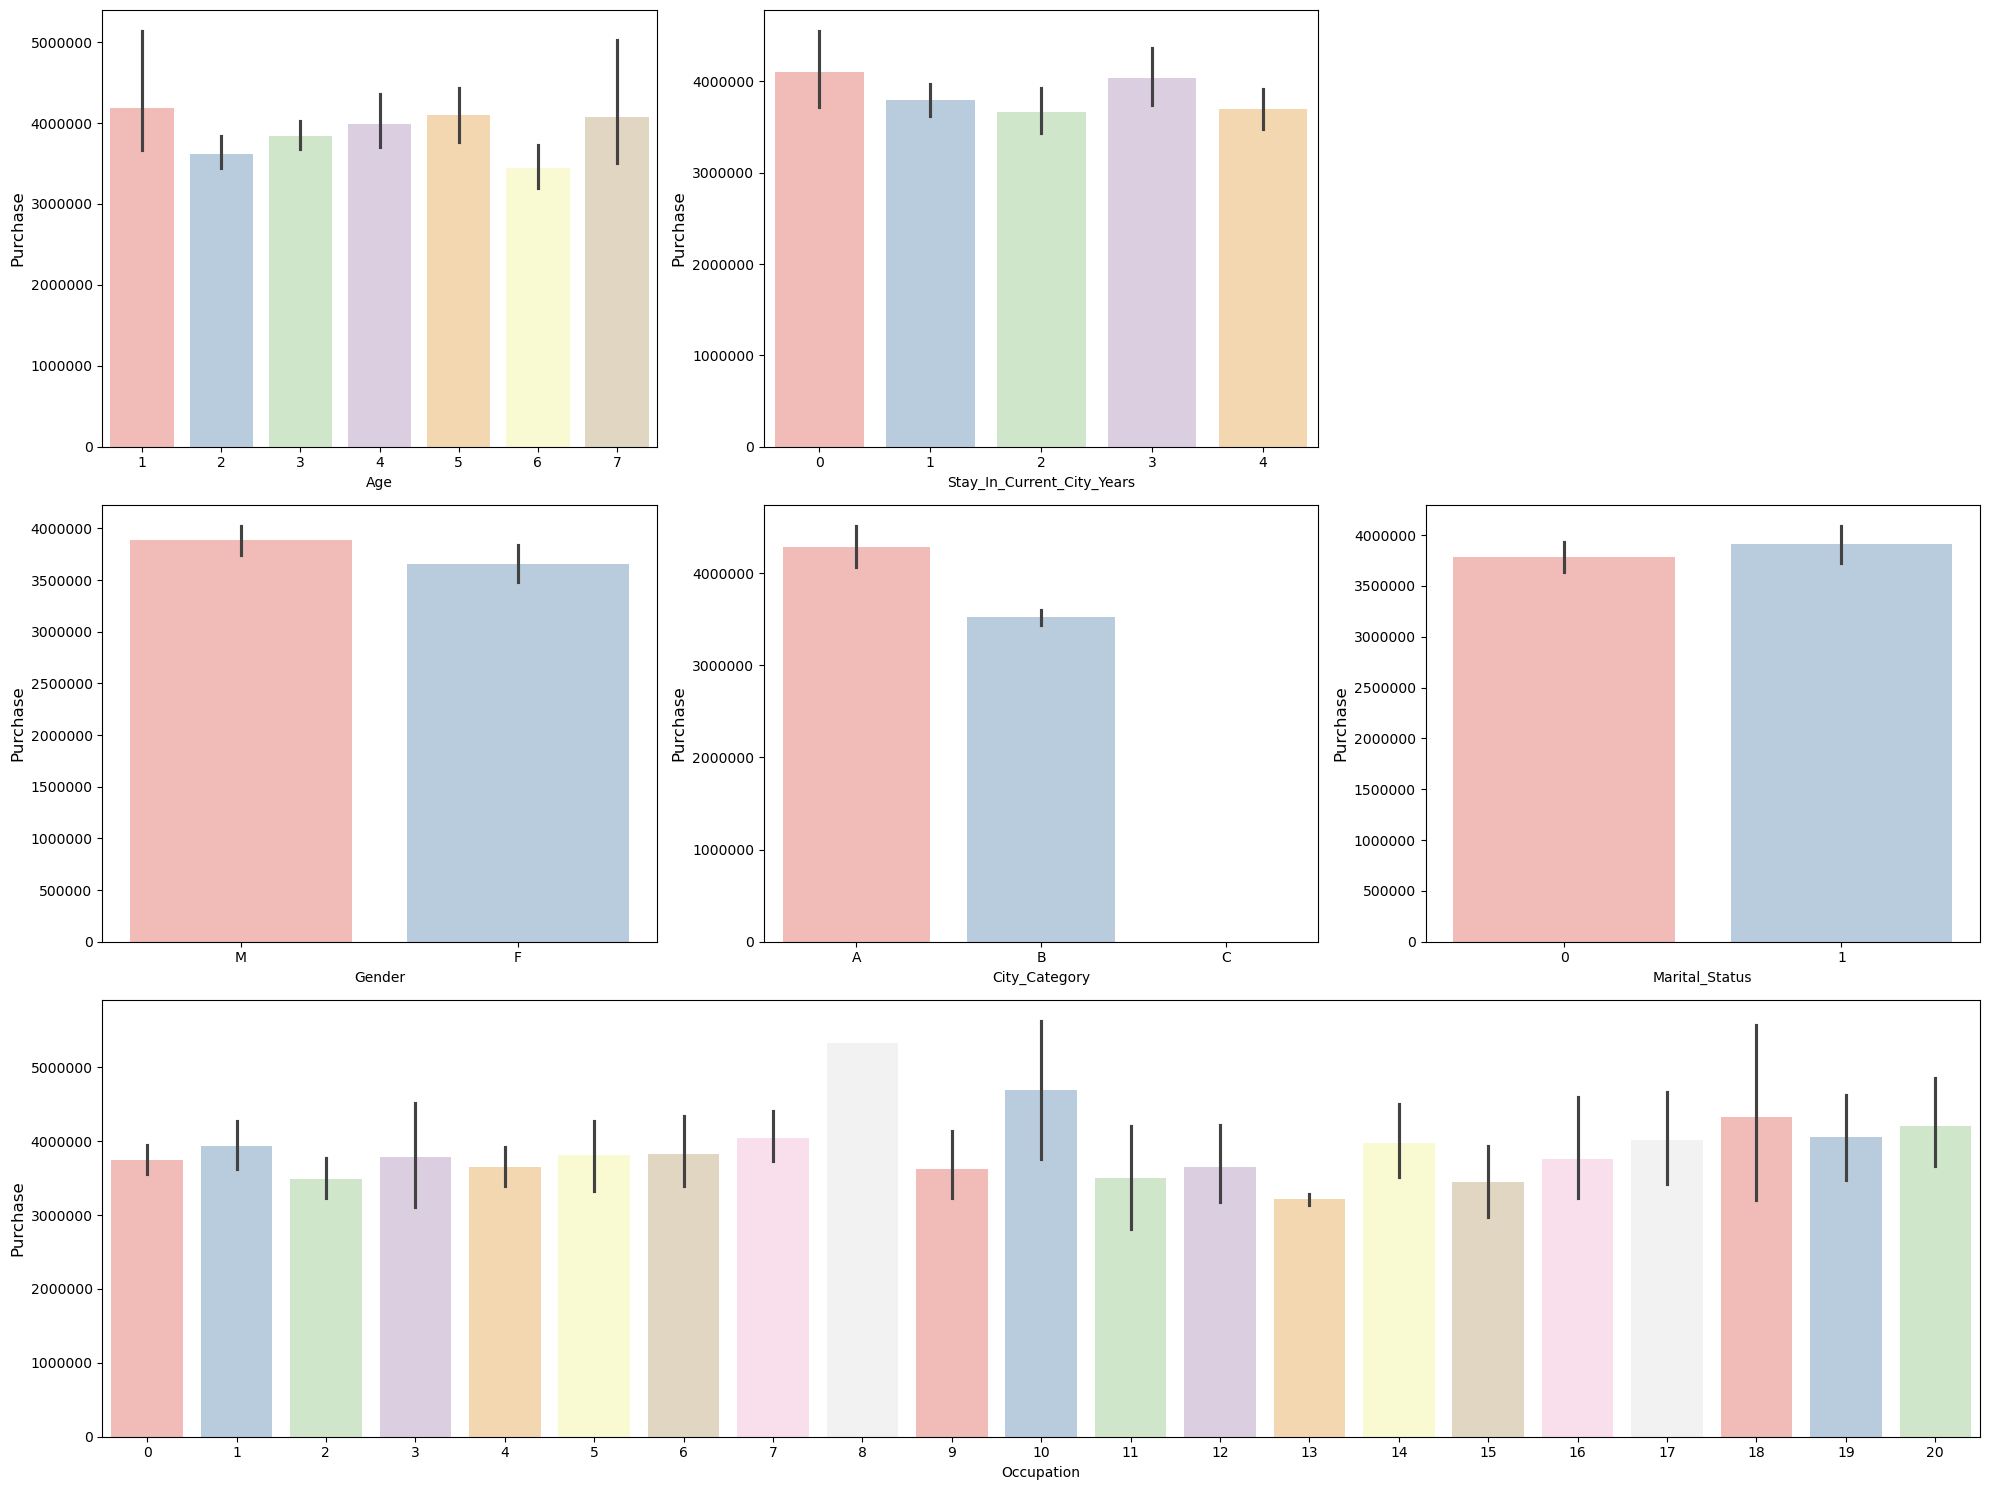

In [35]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3) 
ax1 = fig.add_subplot(gs[0, 0])  # 첫 번째 행 첫 번째 열
sns.barplot(data=filtered_vip_df, x='Age', y='Purchase', estimator=np.mean, ax=ax1, palette='Pastel1')

ax2 = fig.add_subplot(gs[0, 1])  # 첫 번째 행 두 번째 열
sns.barplot(data=filtered_vip_df, x='Stay_In_Current_City_Years', y='Purchase', estimator=np.mean, ax=ax2, palette='Pastel1')

ax3 = fig.add_subplot(gs[1, 0])  # 두 번째 행 첫 번째 열
sns.barplot(data=filtered_vip_df, x='Gender', y='Purchase', estimator=np.mean, ax=ax3, palette='Pastel1')

ax4 = fig.add_subplot(gs[1, 1])  # 두 번째 행 두 번째 열
sns.barplot(data=filtered_vip_df, x='City_Category', y='Purchase', estimator=np.mean, ax=ax4, palette='Pastel1', order=['A', 'B', 'C'])

ax5 = fig.add_subplot(gs[1, 2])  # 두 번째 행 세 번째 열
sns.barplot(data=filtered_vip_df, x='Marital_Status', y='Purchase', estimator=np.mean, ax=ax5, palette='Pastel1')

ax6 = fig.add_subplot(gs[2, :])  # 세 번째 행 전체를 차지하는 서브플롯
sns.barplot(data=filtered_vip_df, x='Occupation', y='Purchase', estimator=np.mean, ax=ax6, palette='Pastel1')

def format_func(value, tick_number):
    return int(value)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_ylabel('Purchase', fontsize=12)
fig.set_tight_layout(True)
plt.show()

vip 회원 중 8번 직업의 평균 구매력이 가장 높다

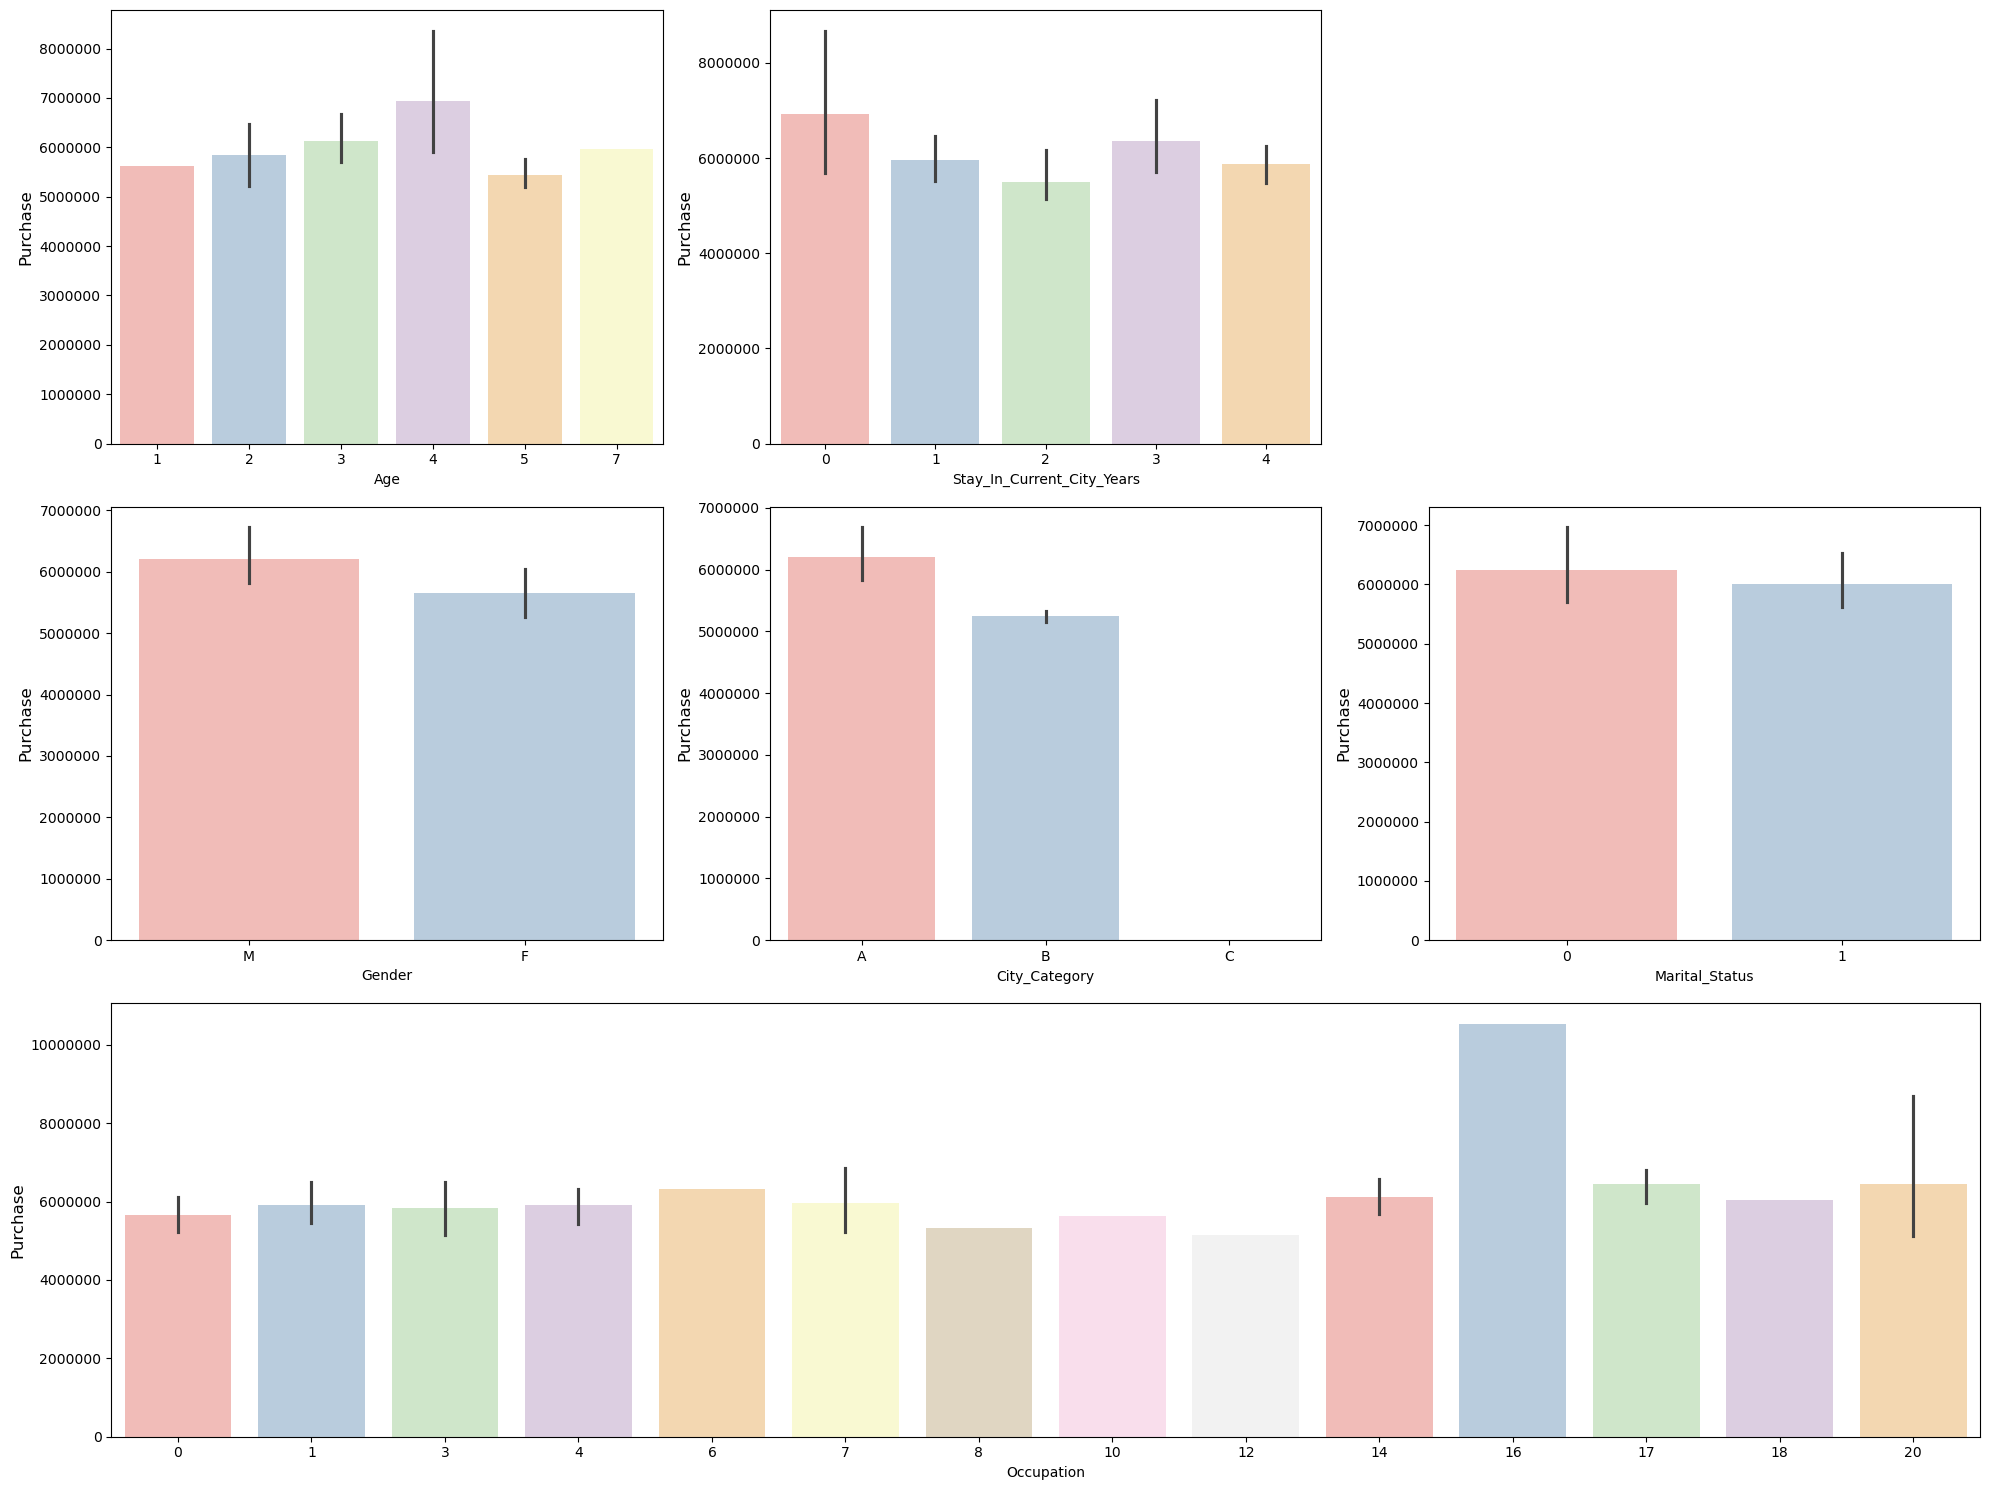

In [36]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3) 
ax1 = fig.add_subplot(gs[0, 0])  # 첫 번째 행 첫 번째 열
sns.barplot(data=filtered_vvip_df, x='Age', y='Purchase', estimator=np.mean, ax=ax1, palette='Pastel1')

ax2 = fig.add_subplot(gs[0, 1])  # 첫 번째 행 두 번째 열
sns.barplot(data=filtered_vvip_df, x='Stay_In_Current_City_Years', y='Purchase', estimator=np.mean, ax=ax2, palette='Pastel1')

ax3 = fig.add_subplot(gs[1, 0])  # 두 번째 행 첫 번째 열
sns.barplot(data=filtered_vvip_df, x='Gender', y='Purchase', estimator=np.mean, ax=ax3, palette='Pastel1')

ax4 = fig.add_subplot(gs[1, 1])  # 두 번째 행 두 번째 열
sns.barplot(data=filtered_vvip_df, x='City_Category', y='Purchase', estimator=np.mean, ax=ax4, palette='Pastel1', order=['A', 'B', 'C'])

ax5 = fig.add_subplot(gs[1, 2])  # 두 번째 행 세 번째 열
sns.barplot(data=filtered_vvip_df, x='Marital_Status', y='Purchase', estimator=np.mean, ax=ax5, palette='Pastel1')

ax6 = fig.add_subplot(gs[2, :])  # 세 번째 행 전체를 차지하는 서브플롯
sns.barplot(data=filtered_vvip_df, x='Occupation', y='Purchase', estimator=np.mean, ax=ax6, palette='Pastel1')

def format_func(value, tick_number):
    return int(value)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_ylabel('Purchase', fontsize=12)
fig.set_tight_layout(True)
plt.show()

vvip회원의 평균 구매력은 16번 직업의 회원이 압도적으로 많다

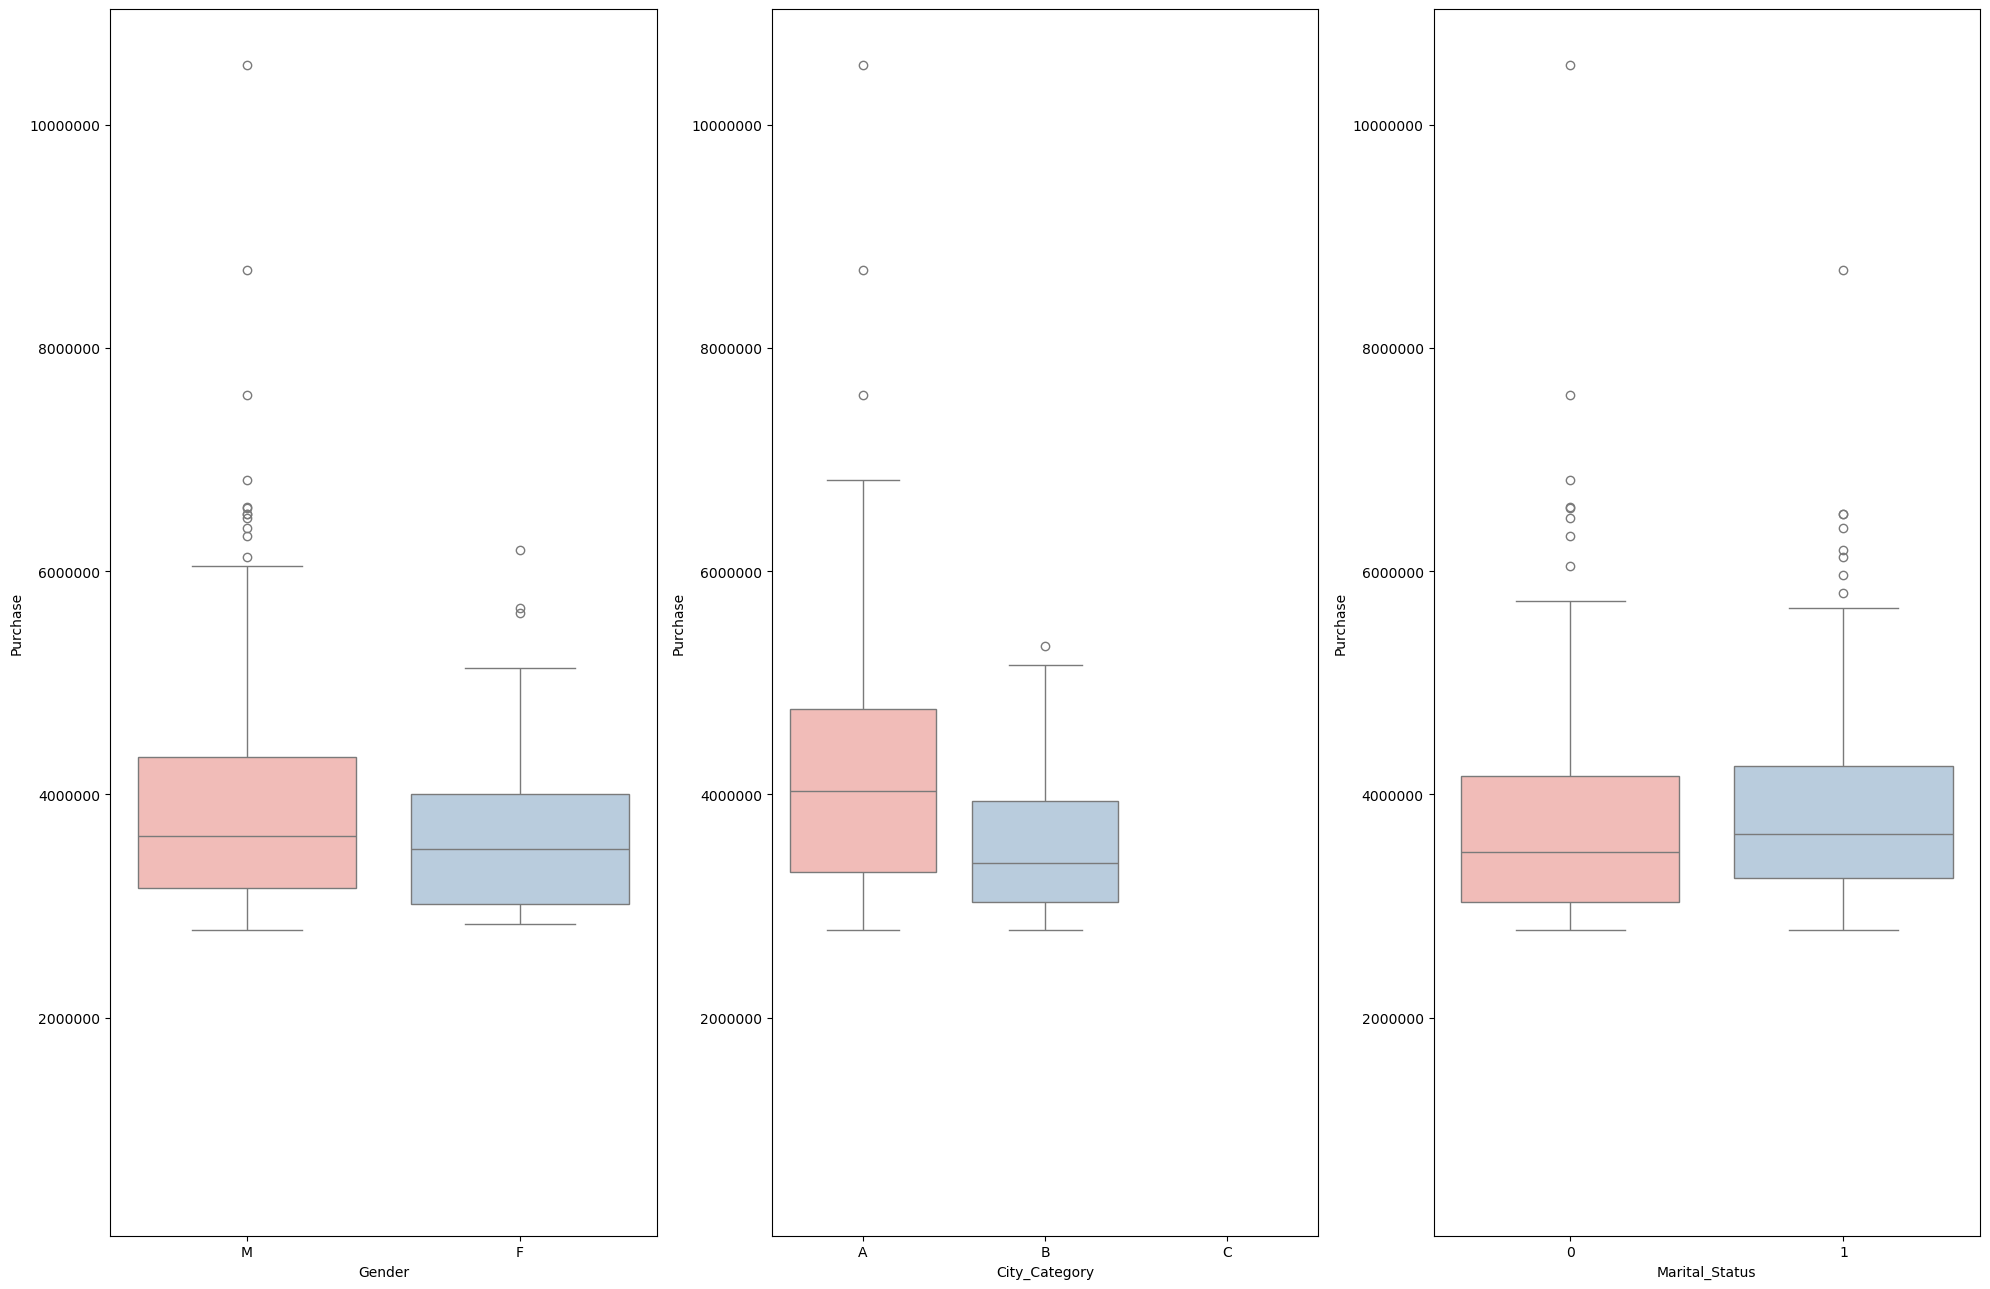

In [37]:
box, ax = plt.subplots(1, 3, figsize=(20, 13))
sns.boxplot(data=filtered_vip_df, x='Gender', y='Purchase', ax=ax[0], palette='Pastel1')
sns.boxplot(data=filtered_vip_df, x='City_Category', y='Purchase', ax=ax[1], palette='Pastel1', order=['A','B','C'])
sns.boxplot(data=filtered_vip_df, x='Marital_Status', y='Purchase', ax=ax[2], palette='Pastel1')
def format_func(value, tick_number):
    return int(value)
for a in ax:
    a.set_ylim(df_uniq_index['Purchase'].min(), df_uniq_index['Purchase'].max()+500000)
    a.yaxis.set_major_locator(plt.AutoLocator())
    a.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
box.set_tight_layout(True)
plt.show()

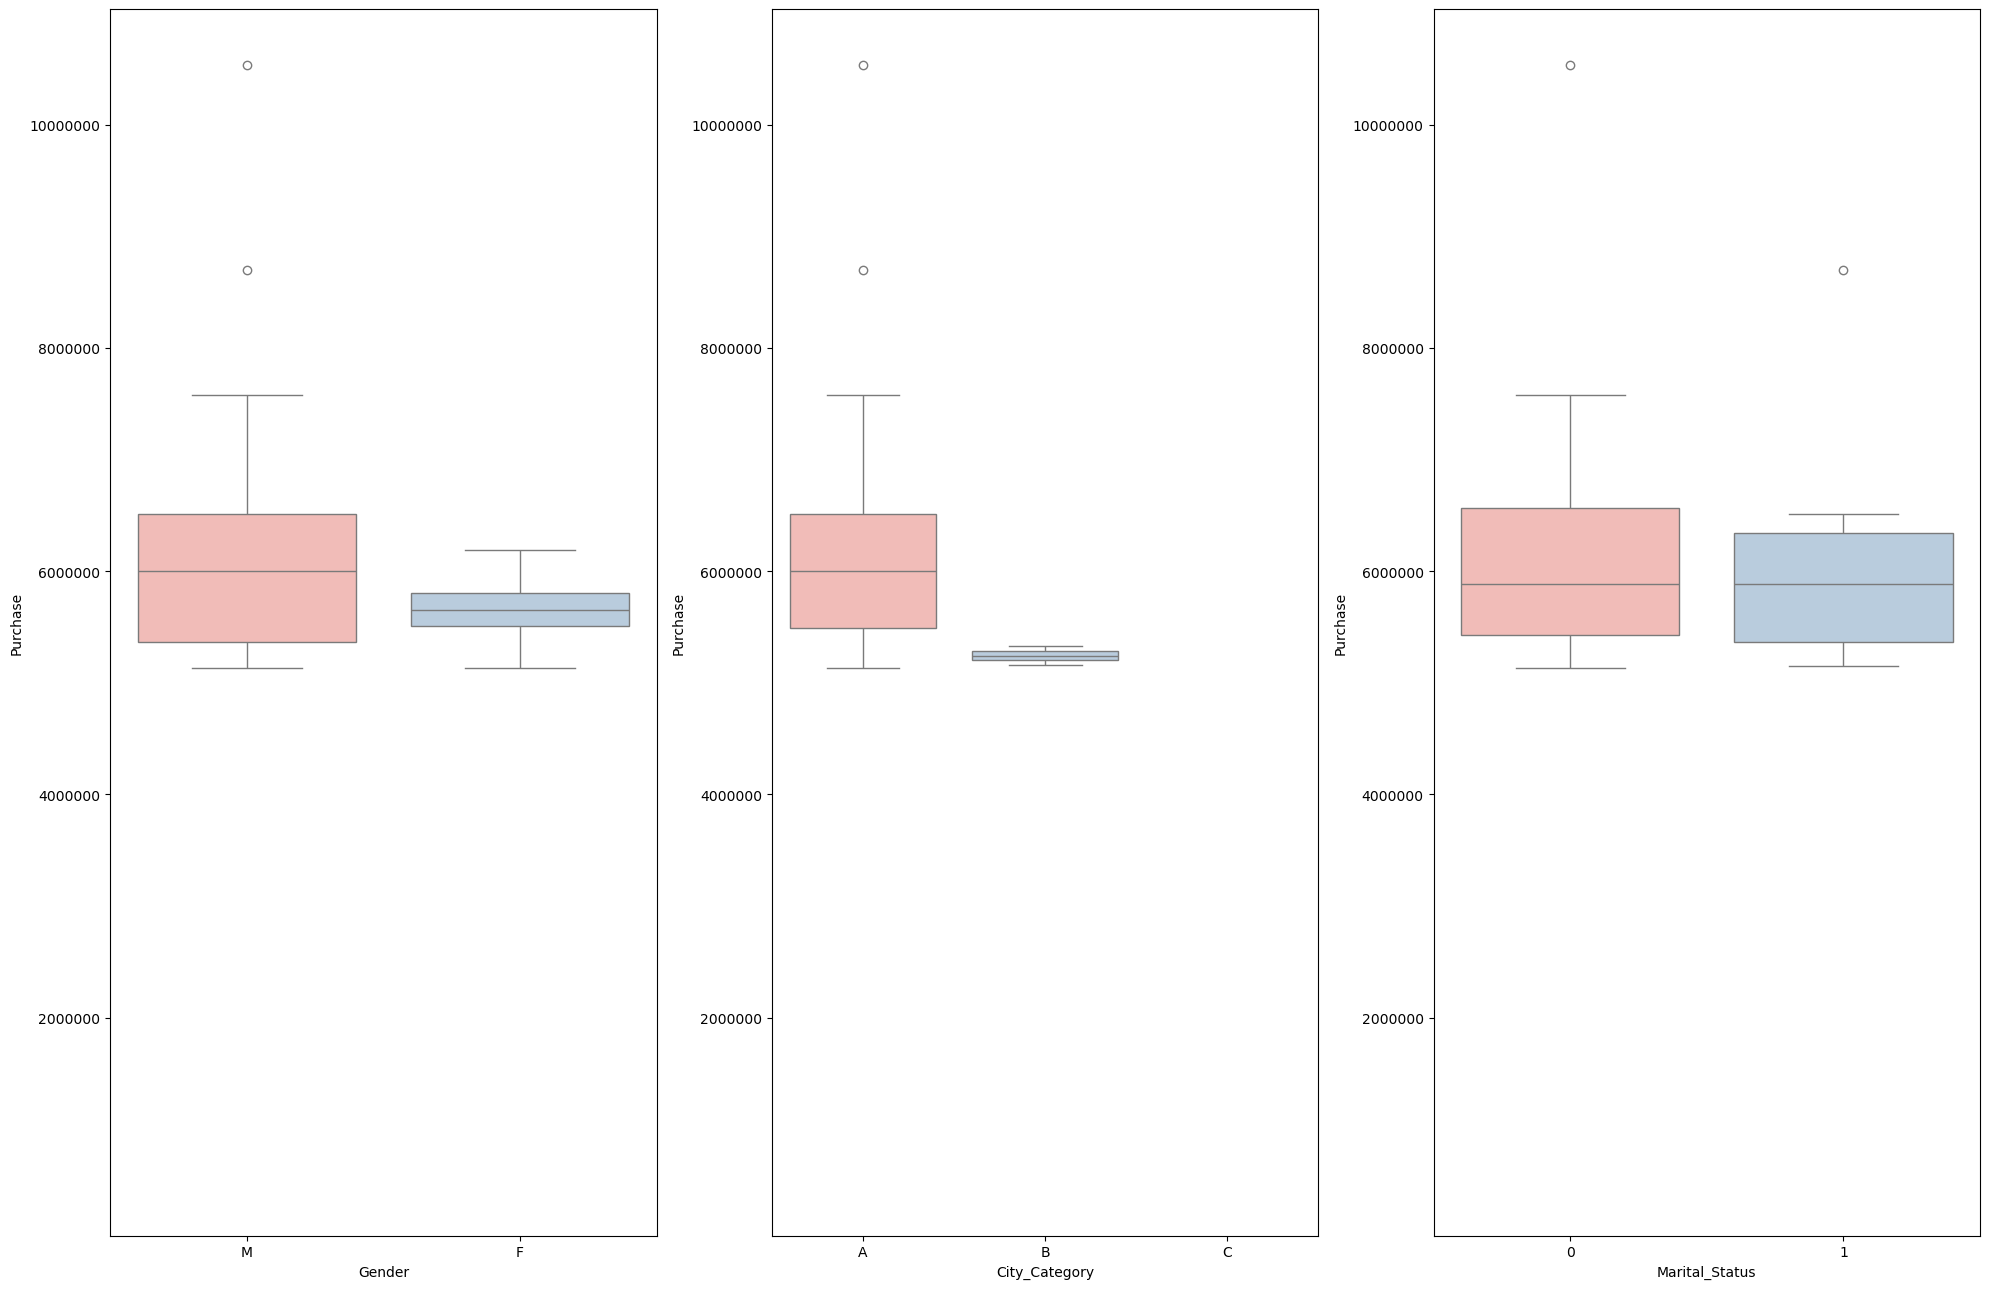

In [38]:
box, ax = plt.subplots(1, 3, figsize=(20, 13))
sns.boxplot(data=filtered_vvip_df, x='Gender', y='Purchase', ax=ax[0], palette='Pastel1')
sns.boxplot(data=filtered_vvip_df, x='City_Category', y='Purchase', ax=ax[1], palette='Pastel1', order=['A','B','C'])
sns.boxplot(data=filtered_vvip_df, x='Marital_Status', y='Purchase', ax=ax[2], palette='Pastel1')
def format_func(value, tick_number):
    return int(value)
for a in ax:
    a.set_ylim(df_uniq_index['Purchase'].min(), df_uniq_index['Purchase'].max()+500000)
    a.yaxis.set_major_locator(plt.AutoLocator())
    a.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
box.set_tight_layout(True)
plt.show()

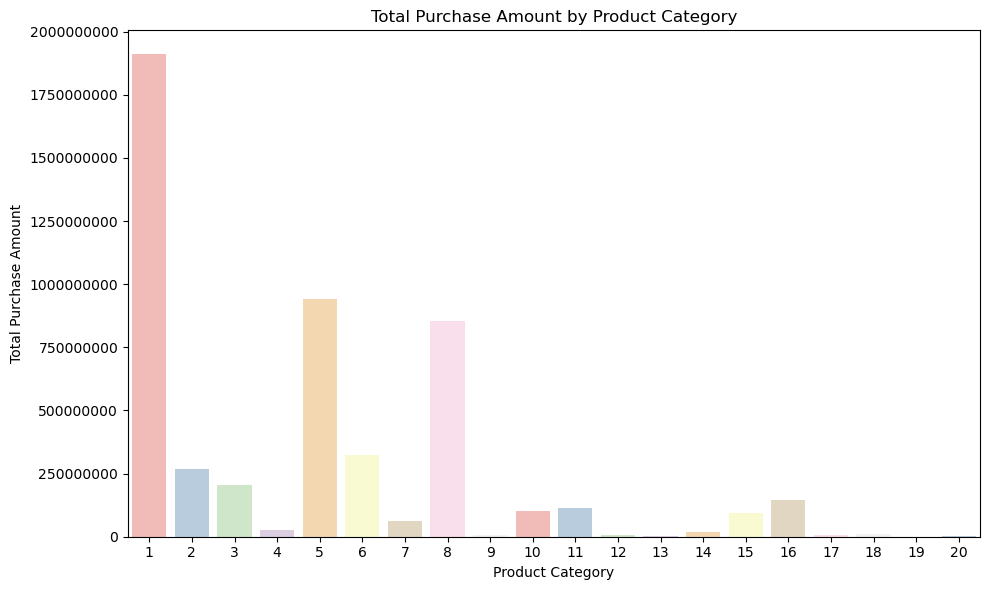

In [39]:
df_purchase_category = df.copy()
category_purchase_sum = df_purchase_category.groupby('Product_Category')['Purchase'].sum().reset_index()
sorted_category_purchase = category_purchase_sum.sort_values(by='Purchase', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Purchase', data=sorted_category_purchase, palette='Pastel1')
plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')

def format_func(value, tick_number):
    return int(value)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.tight_layout()  # 레이아웃 조정
plt.show()

총 구매 금액은 1, 5, 8번 순으로 많고 1번이 압도적으로 많다

In [57]:
product_df = pd.merge(category_purchase_sum, df.Product_Category.value_counts().reset_index(), on='Product_Category')
product_df.columns = ['Product_Category', 'Purchase', 'Purchase_Count']
product_df['Product_AVG_Price'] = product_df.Purchase / product_df.Purchase_Count
product_df

,Product_Category,Purchase,Purchase_Count,Product_AVG_Price
0,1,1910013754,140378,13606.218596
1,2,268516186,23864,11251.935384
2,3,204084713,20213,10096.705734
3,4,27380488,11753,2329.659491
4,5,941835229,150933,6240.088178
5,6,324150302,20466,15838.478550
6,7,60896731,3721,16365.689600
7,8,854318799,113925,7498.958078
8,9,6370324,410,15537.375610
9,10,100837301,5125,19675.570927


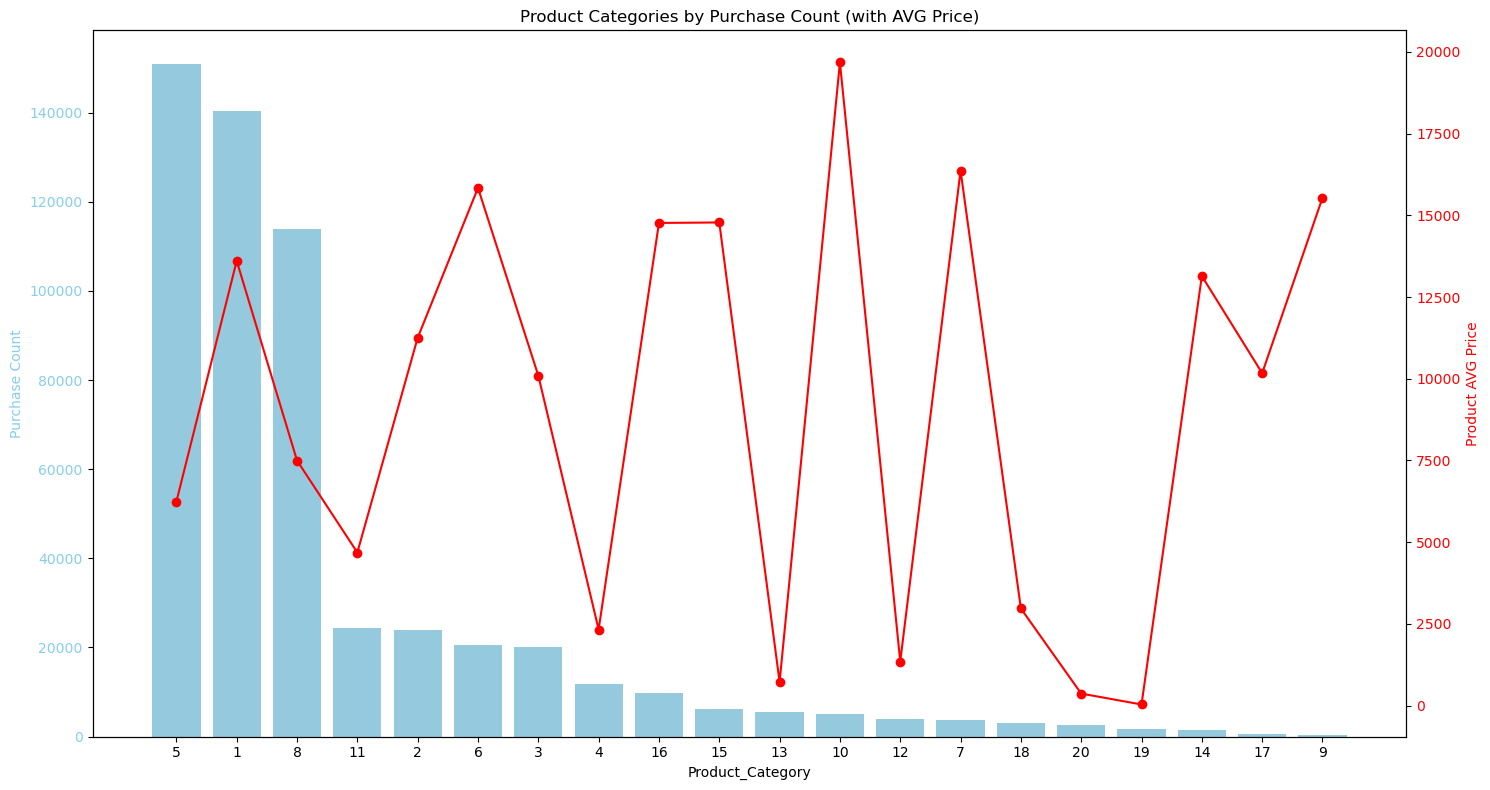

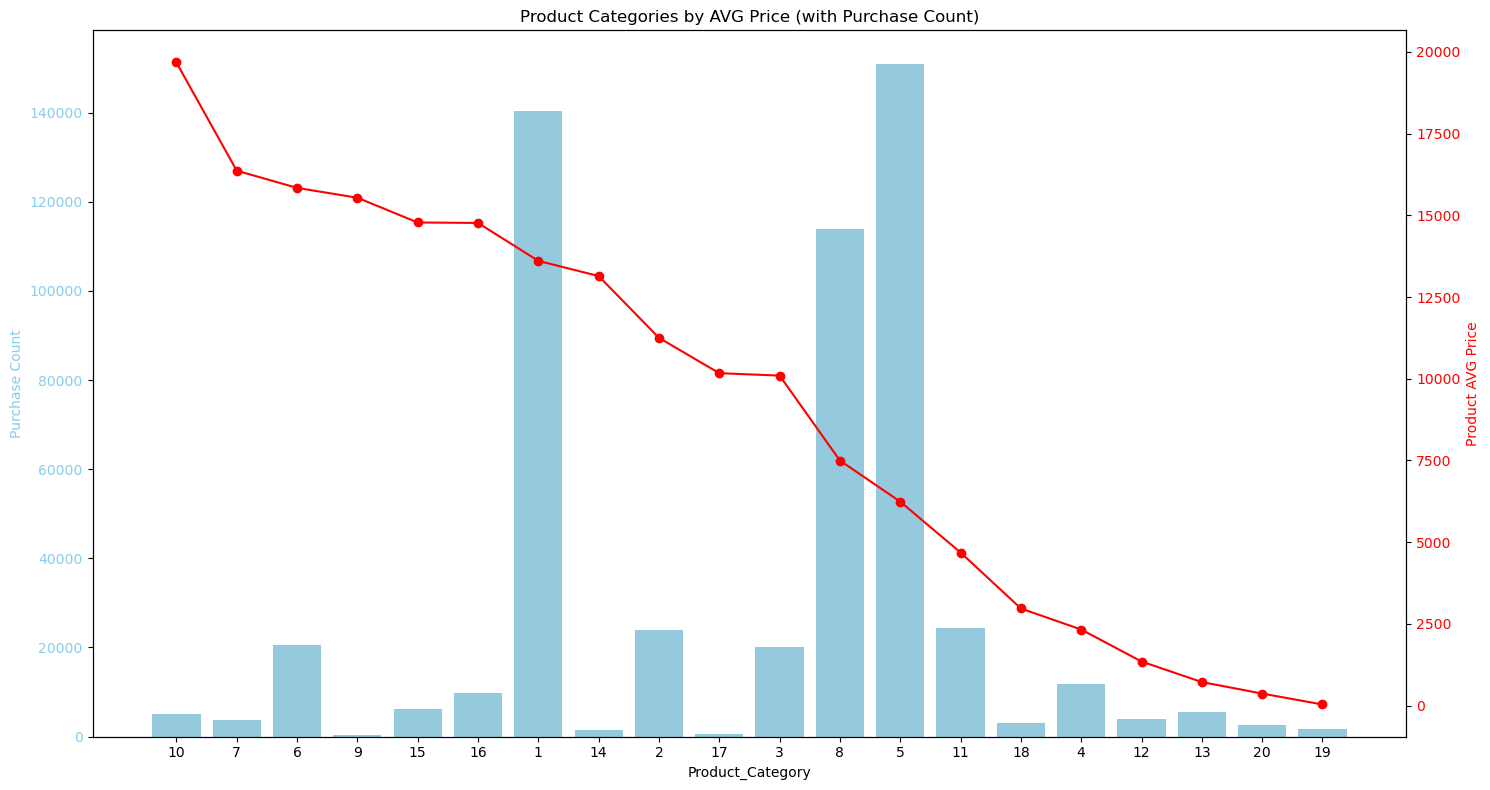

In [66]:
def plot_count_with_avg_price(df, sort_by, title):
    # 데이터 정렬 후 역순으로 뒤집기
    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)
    # df_sorted = df_sorted.iloc[::-1].reset_index(drop=True)
    
    fig, ax1 = plt.subplots(figsize=(15, 8))
    
    # Purchase_Count 막대 그래프
    sns.barplot(x='Product_Category', y='Purchase_Count', data=df_sorted, order=df_sorted['Product_Category'], ax=ax1, color='skyblue')
    
    # 왼쪽 y축 레이블 설정
    ax1.set_ylabel('Purchase Count', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    
    # 오른쪽 y축 생성
    ax2 = ax1.twinx()
    
    # Product_AVG_Price 선 그래프
    ax2.plot(range(len(df_sorted)), df_sorted['Product_AVG_Price'], color='red', marker='o')
    ax2.set_ylabel('Product AVG Price', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # x축 아래에 Product_Category 표시
    ax1.set_xticks(range(len(df_sorted)))
    ax1.set_xticklabels([f'{cat}' for cat in df_sorted['Product_Category']])
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Purchase_Count 순으로 정렬된 차트
plot_count_with_avg_price(product_df, 'Purchase_Count', 'Product Categories by Purchase Count (with AVG Price)')

# Product_AVG_Price 순으로 정렬된 차트
plot_count_with_avg_price(product_df, 'Product_AVG_Price', 'Product Categories by AVG Price (with Purchase Count)')

1. 구매 횟수로 봤을 때 5번 1번 8번 상품 카테고리가 가장 많았고, 5,1,8은 생필품으로 추정됨
2. 전체 구매 금액에서 구매 횟수로 나눈 제품 카테고리의 평균 가격으로 봤을 때 10,7이 가장 높으면서 구매 횟수는 낮았기 때문에 10번과 7번은 사치품으로 추정

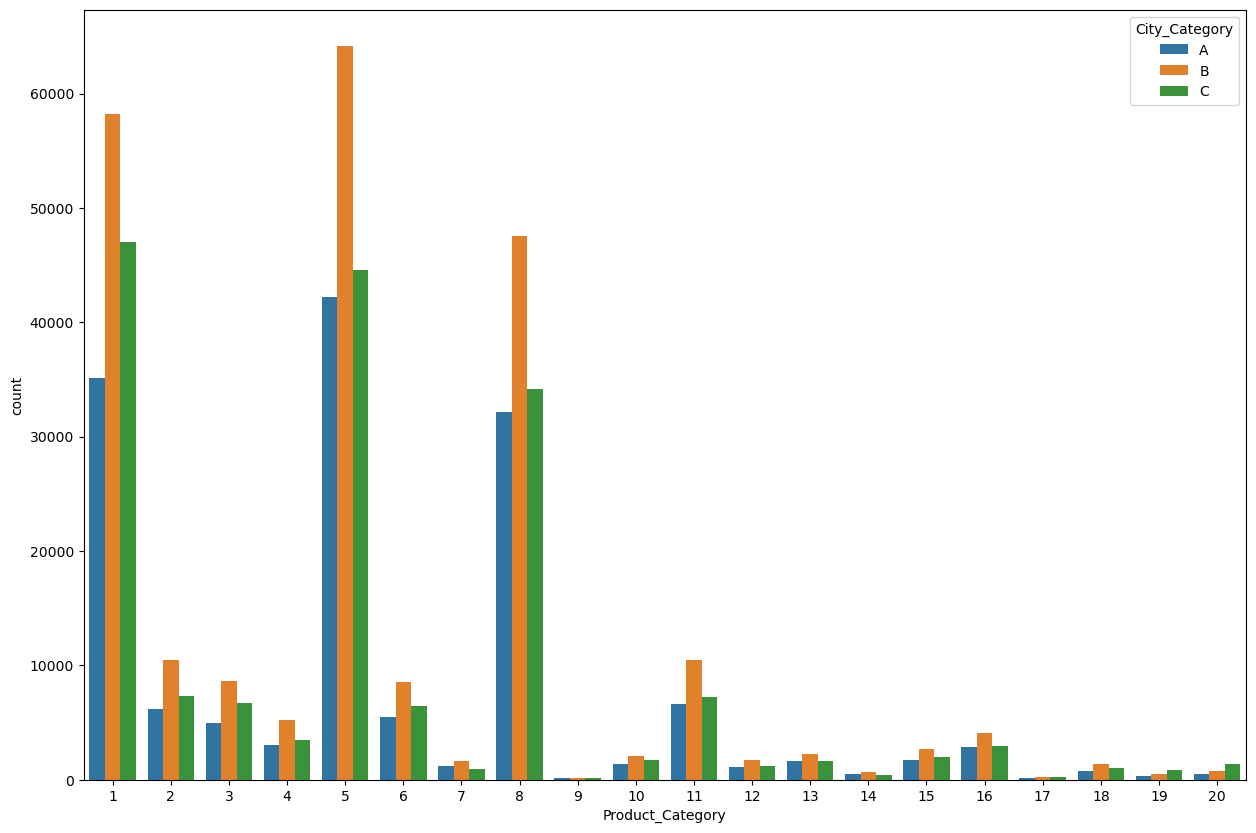

In [76]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category', hue='City_Category')
plt.show()

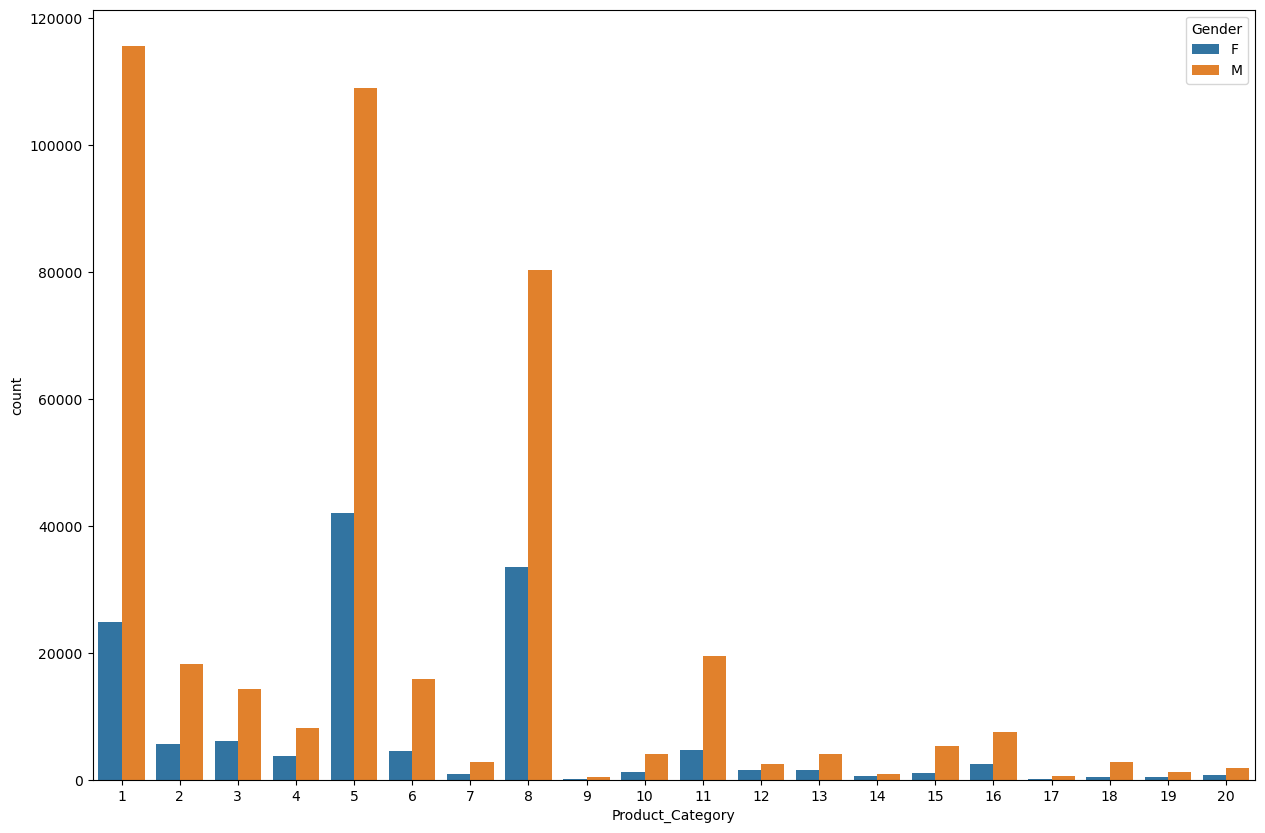

In [77]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category', hue='Gender')
plt.show()

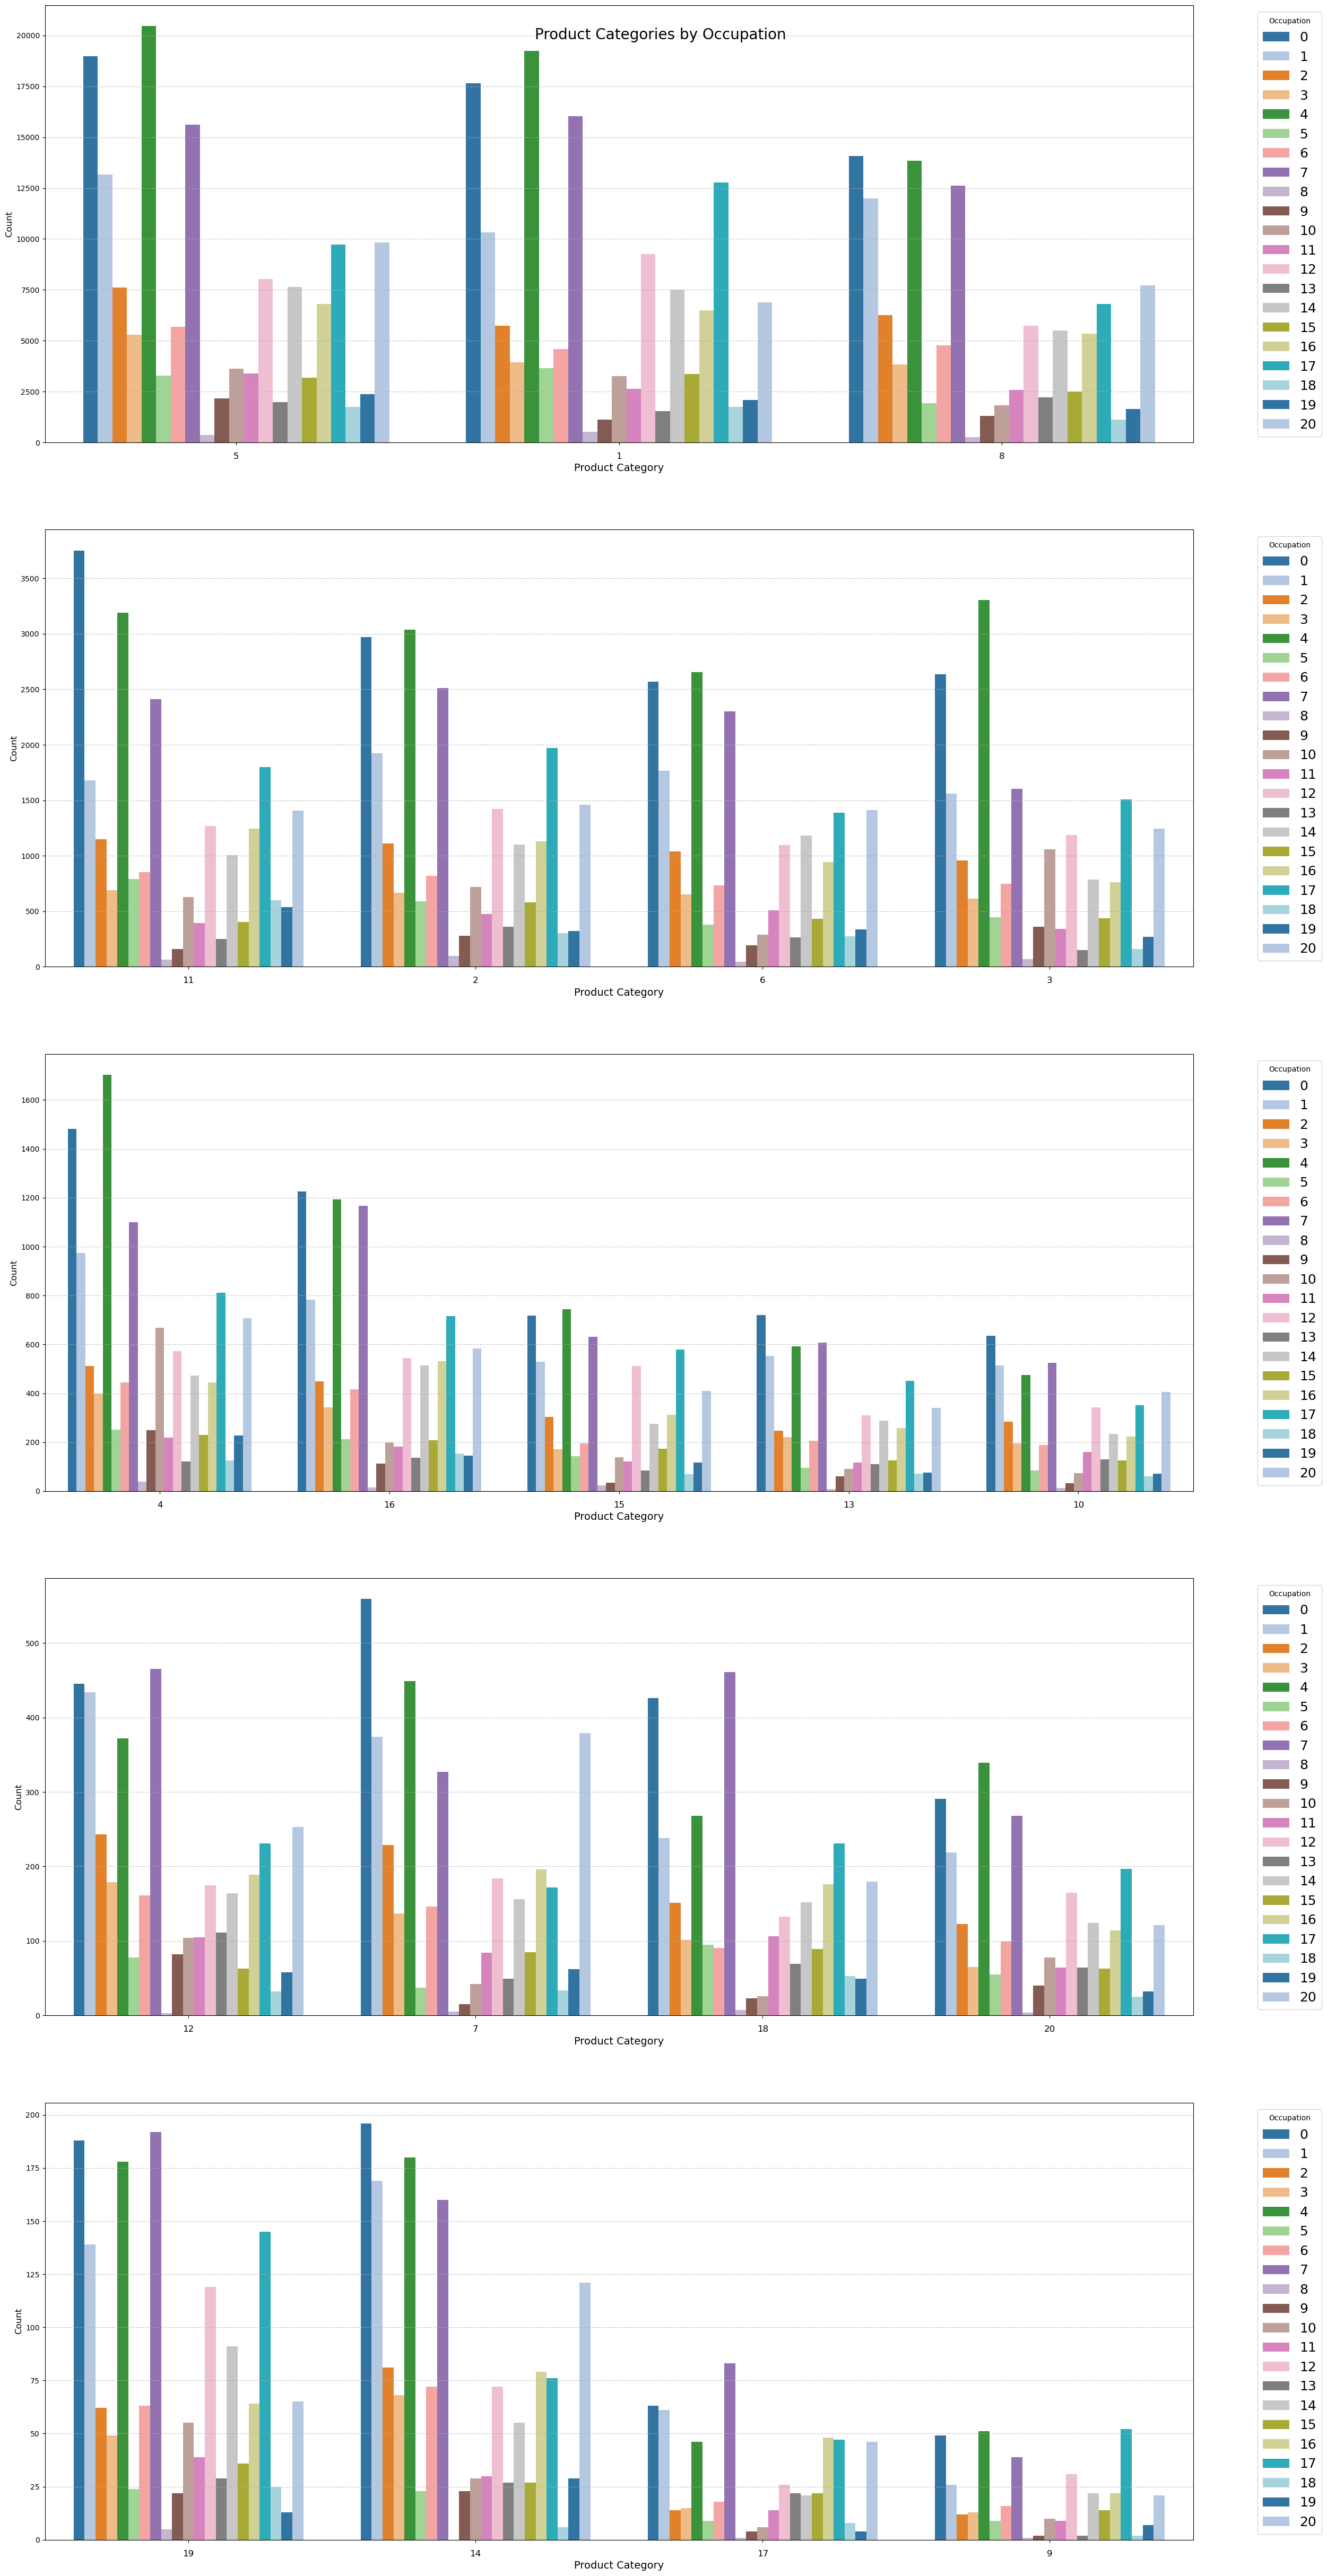

In [107]:
# 데이터 전처리
product_counts = df['Product_Category'].value_counts().sort_values(ascending=False)
product_categories = product_counts.index.tolist()

# 그룹 나누기
groups = [product_categories[:3], product_categories[3:7], product_categories[7:12], 
          product_categories[12:16], product_categories[16:]]

# 모든 Occupation 값을 포함하도록 수정
all_occupations = sorted(df['Occupation'].unique().tolist() + [6])  # 6을 명시적으로 추가

# 20개 이상의 구분하기 쉬운 색상 팔레트 생성
color_palette = sns.color_palette("tab20", n_colors=len(all_occupations))
color_dict = dict(zip(all_occupations, color_palette))

# 플롯 설정
fig, axes = plt.subplots(5, 1, figsize=(25, 50))
fig.suptitle('Product Categories by Occupation', fontsize=20)

# 각 그룹에 대해 서브플롯 생성
for i, group in enumerate(groups):
    # 현재 그룹의 데이터만 선택
    group_data = df[df['Product_Category'].isin(group)]
    
    # 현재 그룹 내에서 Product_Category와 Occupation 조합의 빈도수 계산
    group_counts = group_data.groupby(['Product_Category', 'Occupation']).size().unstack(fill_value=0)
    group_counts_sum = group_counts.sum(axis=1).sort_values(ascending=False)
    
    # 데이터 재구성
    plot_data = group_counts.reindex(group_counts_sum.index).stack().reset_index(name='count')
    
    # countplot 그리기
    sns.barplot(data=plot_data, x='Product_Category', y='count', hue='Occupation', ax=axes[i],
                order=group_counts_sum.index, palette=color_dict)
    
    # x축 레이블 설정
    axes[i].set_xlabel('Product Category', fontsize=14)
    axes[i].set_xticklabels(group_counts_sum.index, rotation=0, ha='center', fontsize=12)
    
    # y축 레이블 설정
    axes[i].set_ylabel('Count', fontsize=12)
    
    # 범례 위치 조정

    axes[i].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

    
    # x축 레이블 위치 조정
    axes[i].tick_params(axis='x', which='major', pad=10)
    
    # 그리드 추가
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()
plt.show()

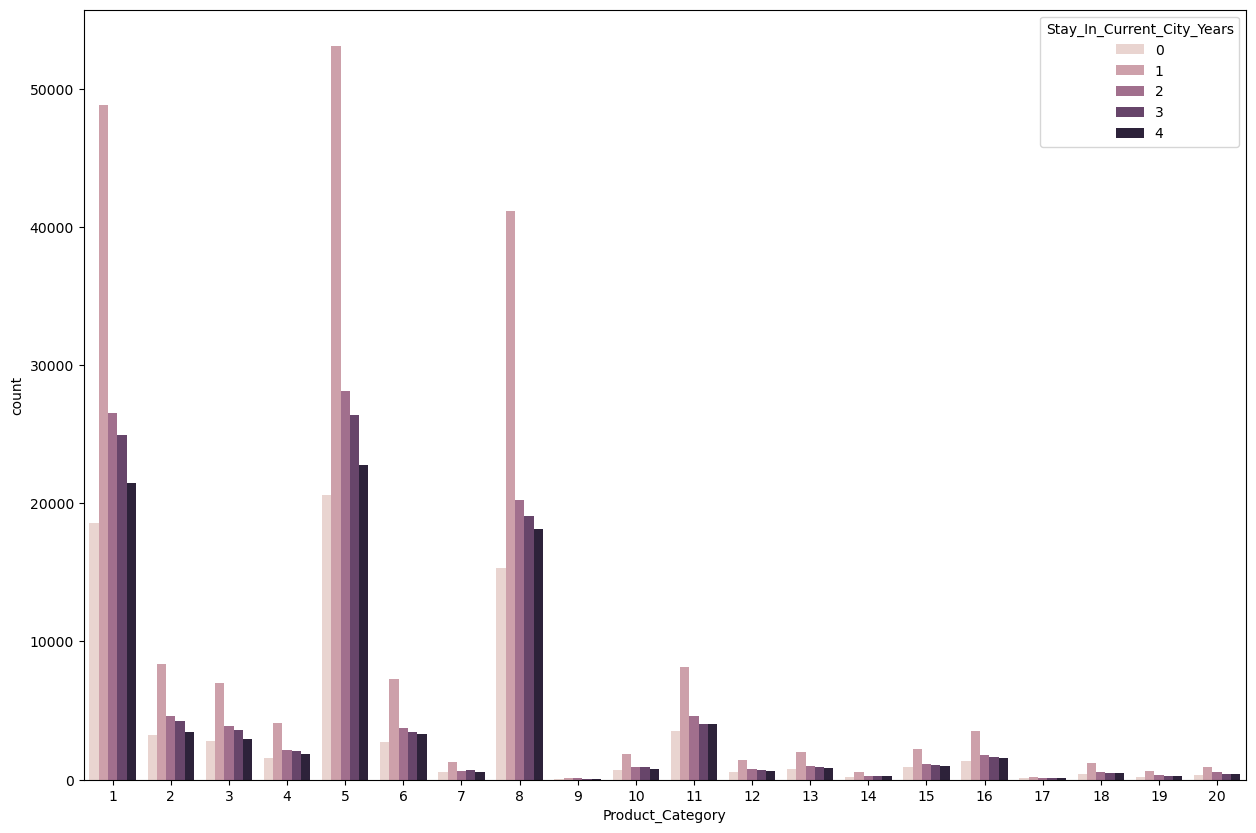

In [111]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category', hue='Stay_In_Current_City_Years')
plt.show()

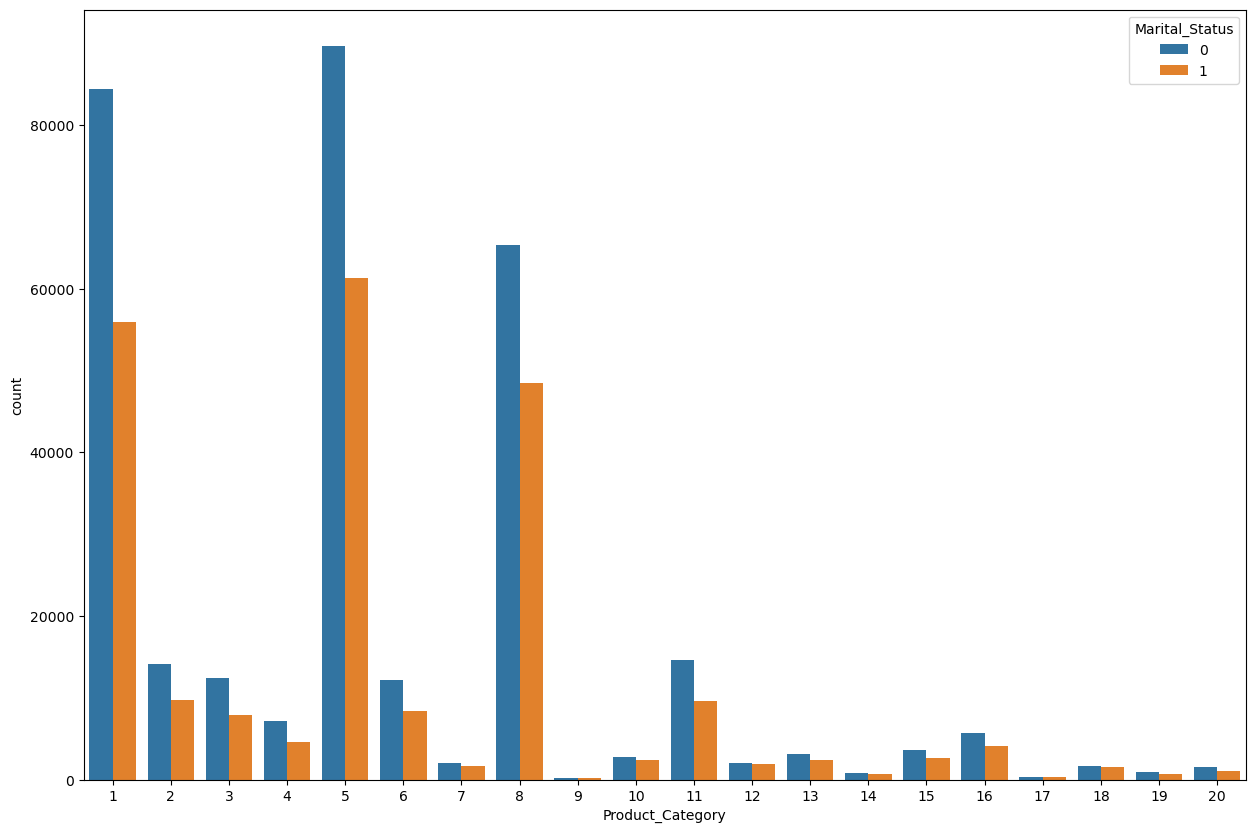

In [112]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category', hue='Marital_Status')
plt.show()

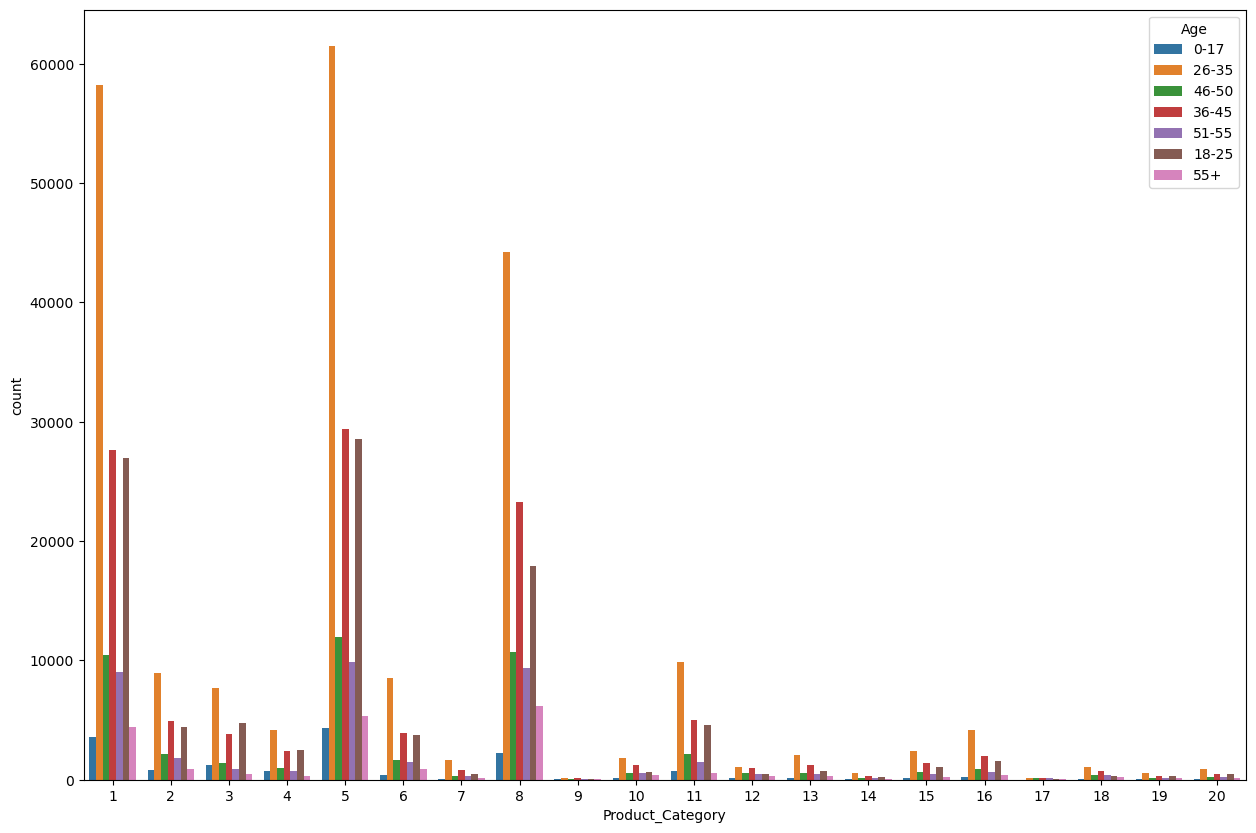

In [110]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category', hue='Age')
plt.show()

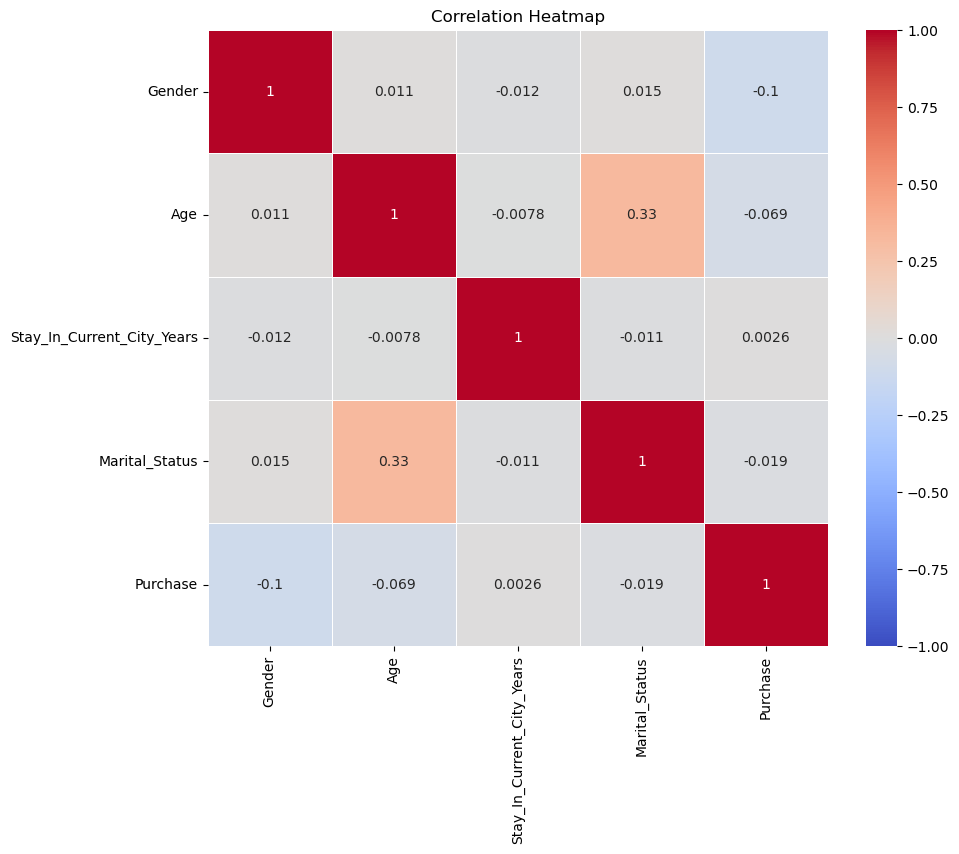

In [41]:
numeric_columns=['Gender','Age','Stay_In_Current_City_Years', 'Marital_Status','Purchase']

df_uniq_age_index_corr = df_uniq_age_index.copy()
df_uniq_age_index_corr['Gender'] = df_uniq_age_index_corr['Gender'].replace({'M':0,'F':1})
# df_uniq_age_index_corr['City_Category'] = df_uniq_age_index_corr['City_Category'].replace({'A':0,'B':1,'C':2})

plt.figure(figsize=(10, 8))
sns.heatmap(df_uniq_age_index_corr[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

성별 및 연령대별 구매 패턴: 성별(Gender)과 연령대(Age)별로 구매(Purchase) 금액의 평균을 비교하여 어떤 그룹이 더 많은 구매를 하는지 파악합니다.   <br/>
<br/>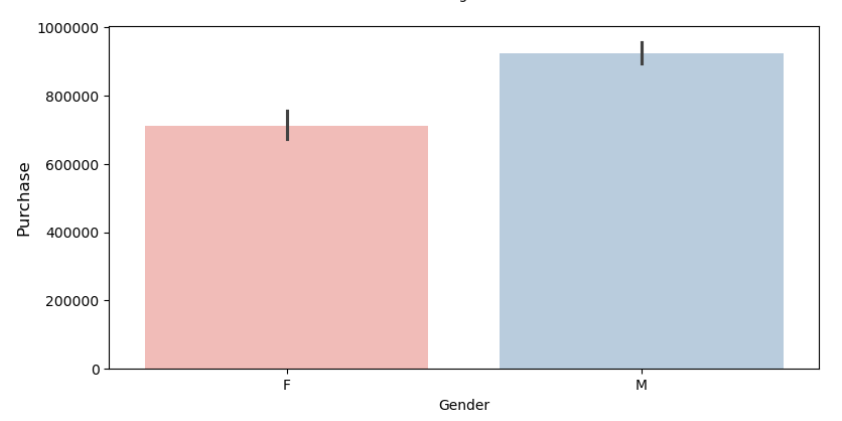   <br/>
<br/>
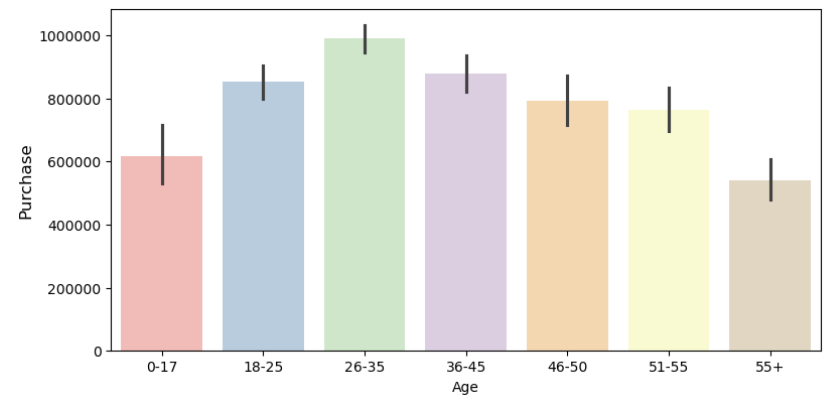   <br/>
<br/>

직업별 평균 구매 금액: Occupation에 따른 구매 금액을 분석하여 어떤 직업군이 가장 높은 소비를 하는지 알아봅니   <br/>
<br/>다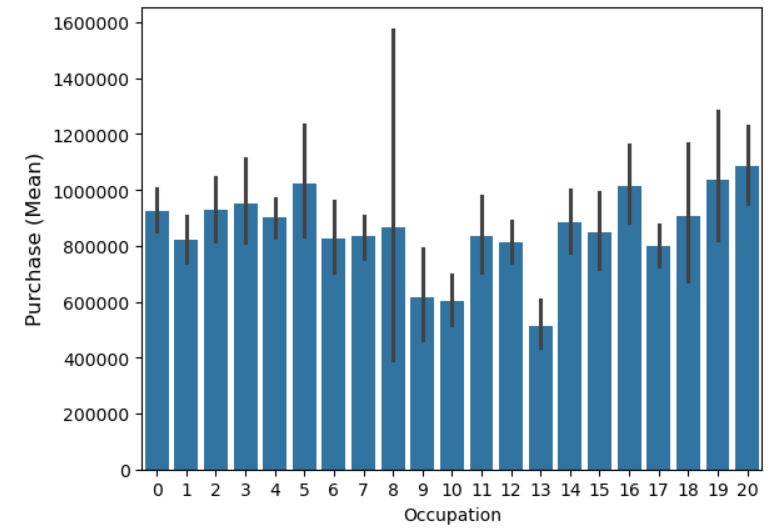    <br/>
<br/>.

도시 카테고리별 소비 행동: City_Category에 따른 평균 구매 금액과 구매 빈도를 분석하여 각 도시의 소비 특성을 파악     <br/>
<br/>합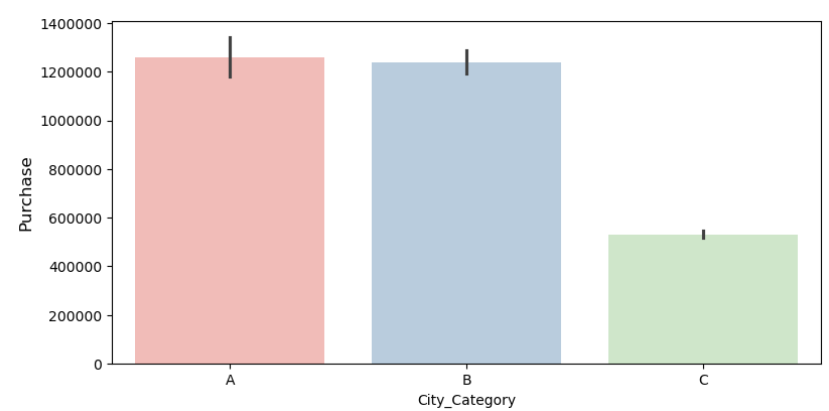   <br/>
<br/>
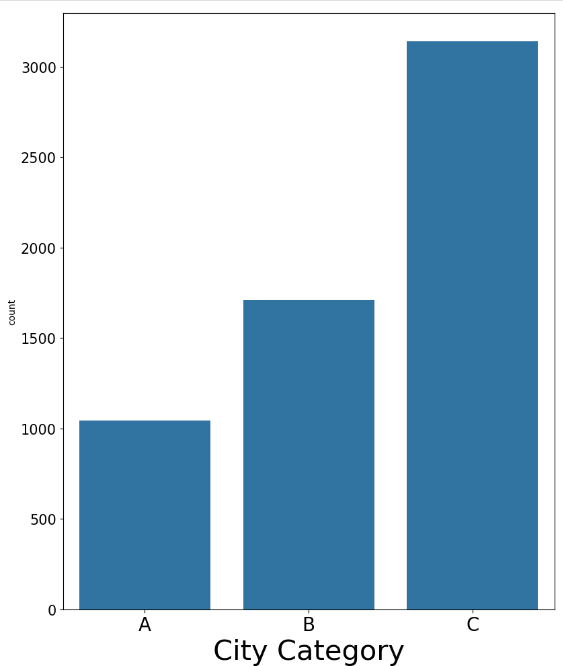   <br/>
<br/>
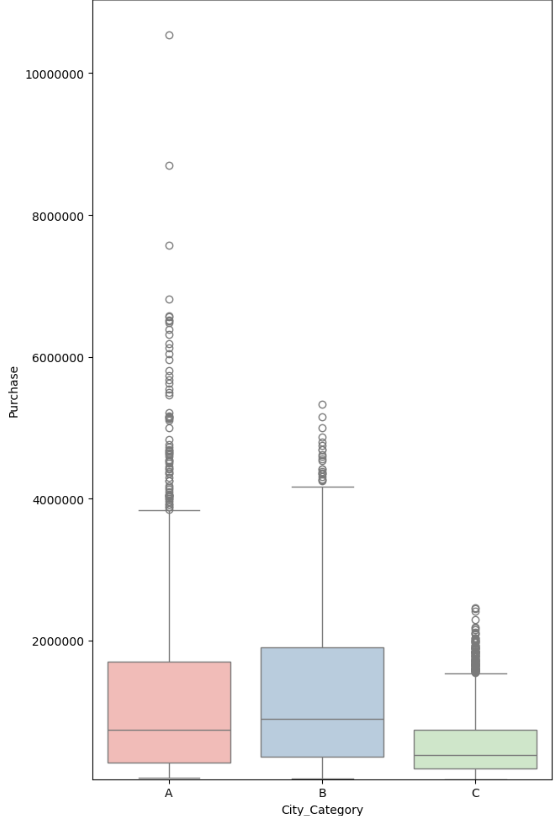   <br/>
<br/>니다.

결혼 여부에 따른 구매 차이: Marital_Status에 따라 구매 패턴을 비교하여 결혼 여부가 소비에 미치는 영향을    <br/>
<br/>분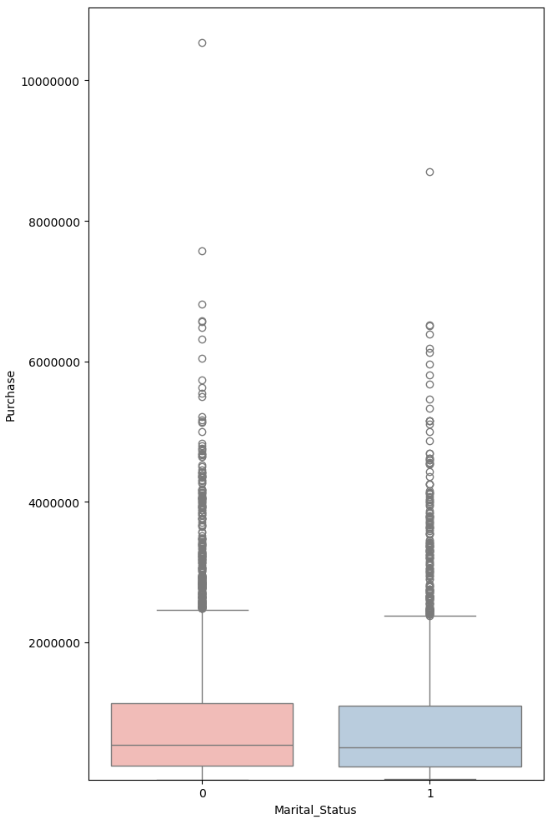   <br/>
<br/>석합니다.

거주 기간과 구매 행동의 관계: Stay_In_Current_City_Years와 구매 금액 간의 상관관계를 분석하여 거주 기간이 소비에 미치는 영향   <br/>을<br/>
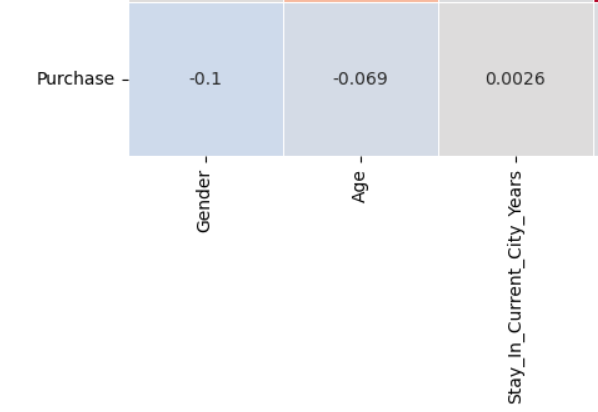  <br/>
<br/> 알아봅니다.

제품 카테고리별 인기 분석: Product_Category별로 구매 금액을 분석하여 가장 인기 있는 제품 카테   <br/>
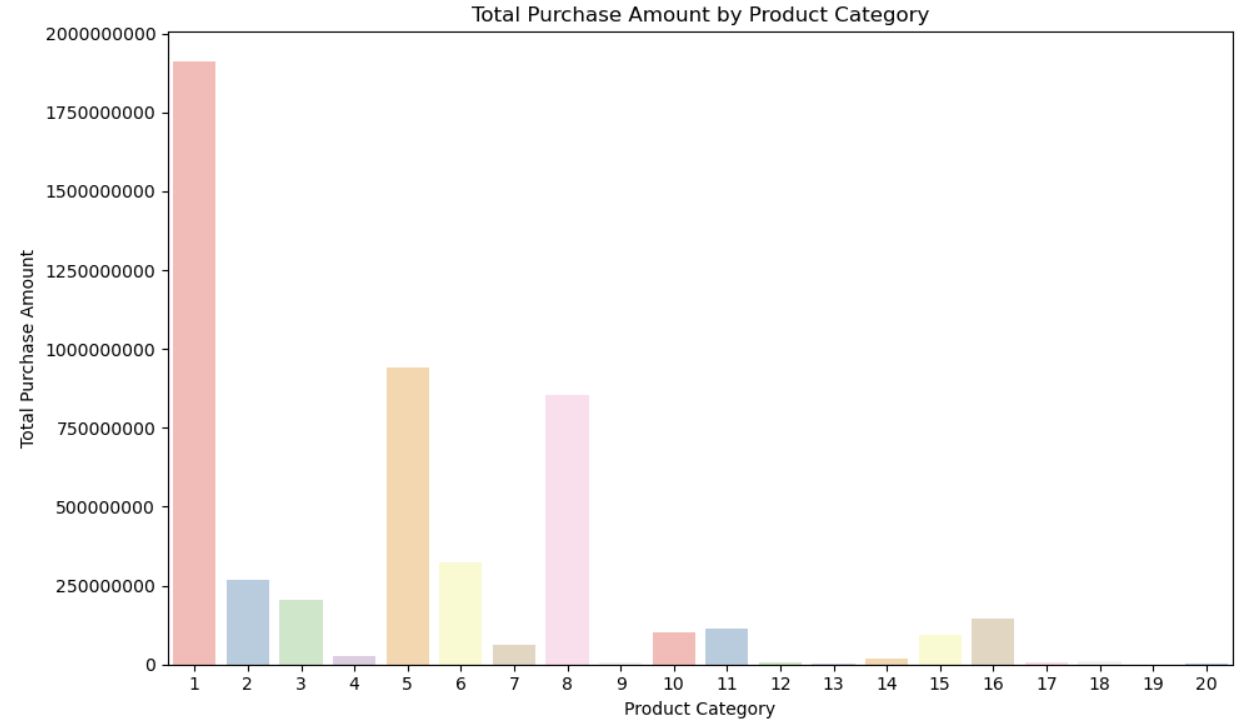 <br/>고<br/>리를 파악합니다.

상위 고객 식별: 가장 많은 구매를 한 상위 고객(User_ID)을 식별하고, 이들의 특성을 분석하여 타겟 마케   <br/>
팅<br/> 전략에 활용합니다.

VIP 고객 도출 및 지역별 구매 고객 특징을 파   <br>악하여 마케팅 전략을 도출